<div class="alert alert-success">
           <h1 style="font-size:25px;"><strong>Projet 4</strong></h1>
           <h1 style="font-size:25px;"><strong>Anticipez les besoins en consommation de bâtiments</strong></h1>
</div>

[camino]:LogoSeattle.png
![alt text][camino]

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

<div class="alert alert-success">
           <h1 style="font-size:25px;"><strong>Étape 1. Nettoyage - Notebook</strong></h1>
</div>

## <font color="#00afe6">Sommaire</font>

[Imports, Chargemernts et connaisance de données. ](#section_A)                                 
[01. Nettoyage des données](#section_1)               
  [1.1. Colonnes et lignes vides](#section_1_1)            
  [1.2 Suppresion de Doublons](#section_1_2)                 
  [1.3 variables redondantes](#section_1_3)              
[02. Explication des variables](#section_2)                    
[03. Compléter les valeurs manquantes ou aberrantes](#section_3)               
[04. Analisis univariée](#section_4)              
[05. Corrélations linéaires ](#section_5)                                          
  [5.1 Analyse des variables à prédire](#section_5_1)                                         
[06. Export du fichier nettoyé](#section_6)                                    
[07. Liens importants](#section_7)                         


<div class="alert alert-success">
    <font id="section_A">
        <h1 style="font-size:25px;"><strong>Imports, Configuration, Chargements et connaisance de données. </strong></h1>
</div>

In [199]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import seaborn as sns
import sys
import IPython as ip
import statsmodels as stat
import sklearn

import datetime
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [200]:
!python -m pip install folium

In [201]:
# Enregistrer le temps de début
début = time.time()

In [202]:
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 70)
pd.set_option('display.precision', 5)
pd.set_option("max_colwidth", 80) 

In [203]:
# Versions
print('Version des librairies utilisées :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)
print('Sklearn       : ' + sklearn.__version__)
print('Geopandas     : ' + sns.__version__)
print('IPython       : ' + ip.__version__)
print('statsmodels   : ' + stat.__version__)


now = datetime.datetime.now().isoformat()
print('Lancé le      : ' + now)

Version des librairies utilisées :
Python        : 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
NumPy         : 1.23.5
Pandas        : 1.5.3
Matplotlib    : 3.7.1
Seaborn       : 0.12.2
Sklearn       : 1.2.2
Geopandas     : 0.12.2
IPython       : 8.12.0
statsmodels   : 0.13.5
Lancé le      : 2023-05-18T15:05:18.941445


In [204]:
datas = pd.read_csv("2016_Building_Energy_Benchmarking.csv", low_memory=False)

Affichons à présent quelques lignes au hasard du dataset puis regardons sa shape

In [205]:
datas.sample(5)

OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
2077          24375      2016     SPS-District K-12            K-12 School   
2600          26210      2016  Multifamily LR (1-4)   Low-Rise Multifamily   
2961          27659      2016  Multifamily LR (1-4)  Senior Care Community   
295             425      2016        NonResidential           Large Office   
63               89      2016        NonResidential         Medical Office   

                                       PropertyName             Address  \
2077                           Hawthorne Elementary   4100 39th Ave. S.   
2600                             Camelot Apartments   533 Harvard Ave E   
2961  24759-Brookdale Queen Anne (800) (Do Not Use)         800 4th Ave   
295                               First and Stewart  101 Stewart Street   
63                        Polyclinic North && South    1200 Harvard Ave   

         City State  ZipCode TaxParcelIdentificationNumber  \
2077  Seattle    WA  98118.0                    7950302375   
2600  Seattle    WA  98102.0                    6850700495   
2961  Seattle    WA  98109.0                    5457801520   
295   Seattle    WA  98101.0                    1977200020   
63    Seattle    WA  98122.0                    1978201270   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
2077                    2              SOUTHEAST  47.56591 -122.28339   
2600                    3                   EAST  47.62408 -122.32231   
2961                    7  MAGNOLIA / QUEEN ANNE  47.62684 -122.34843   
295                     7               DOWNTOWN  47.61029 -122.34089   
63                      3                   EAST  47.61244 -122.32140   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
2077       1989                1.0               3             51672   
2600       1965                1.0               4             30240   
2961       2006                1.0               3             56380   
295        1986                1.0              12            115857   
63         1965                0.0               3            179014   

      PropertyGFAParking  PropertyGFABuilding(s)  \
2077                   0                   51672   
2600                   0                   30240   
2961                   0                   56380   
295                15140                  100717   
63                     0                  179014   

           ListOfAllPropertyUseTypes LargestPropertyUseType  \
2077                     K-12 School            K-12 School   
2600    Multifamily Housing, Parking    Multifamily Housing   
2961  Parking, Senior Care Community  Senior Care Community   
295      Office, Parking, Restaurant                 Office   
63                    Medical Office         Medical Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
2077                    51672.0                          NaN   
2600                    27656.0                      Parking   
2961                    39650.0                      Parking   
295                    104788.0                      Parking   
63                     179014.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2077                              NaN                         NaN   
2600                              0.0                         NaN   
2961                          23385.0                         NaN   
295                           11844.0                  Restaurant   
63                                NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
2077                             NaN                     2016   
2600                             NaN                      NaN   
2961                             NaN                      NaN   
295                            528.0         2017201520142013   
63                      

In [206]:
print ("Le dataset compte {} lignes et {} variables".format(datas.shape[0], datas.shape[1]))

Le dataset compte 3376 lignes et 46 variables


In [207]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

<Axes: >

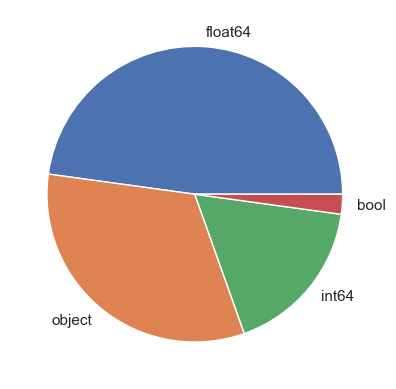

In [208]:
datas.dtypes.value_counts().plot.pie()

<Axes: >

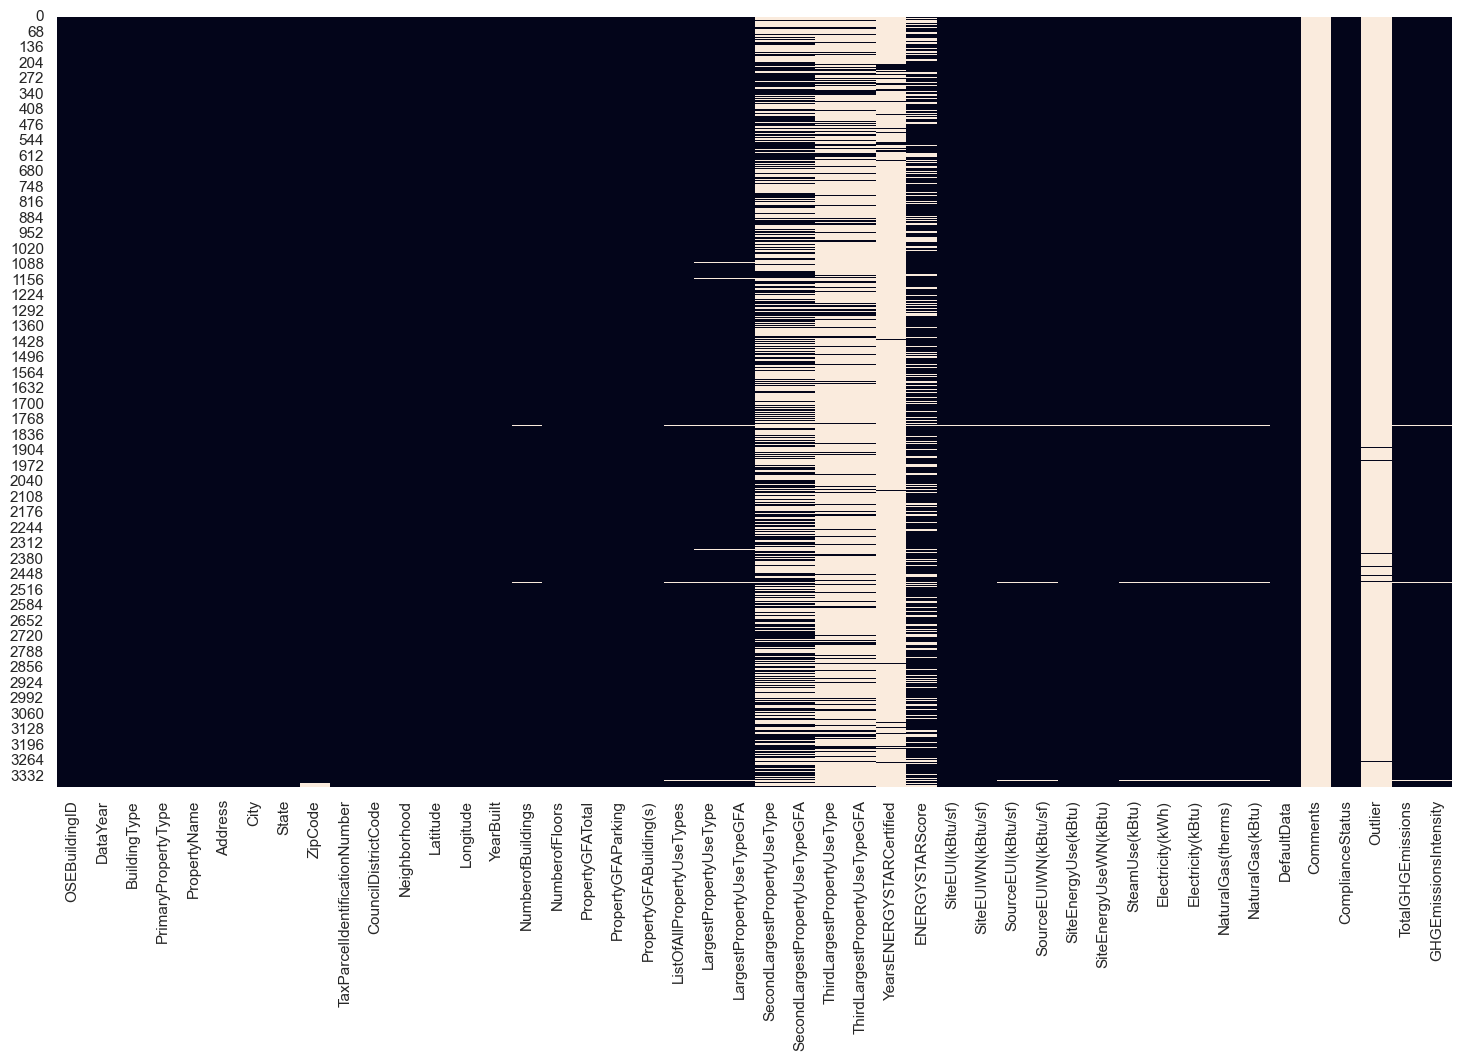

In [209]:
plt.figure(figsize=(18,10))
sns.heatmap(datas.isnull(), cbar=False)

In [210]:
#Nombre de valeurs manquantes totales
nb_nan_tot     = datas.isna().sum().sum()
nb_donnees_tot = np.product(datas.shape)
pourc_nan_tot  = round((nb_nan_tot/nb_donnees_tot)*100,2)

print(f'Valeurs manquantes : {nb_nan_tot} NaN pour {nb_donnees_tot} données ({pourc_nan_tot} %)')

Valeurs manquantes : 19952 NaN pour 155296 données (12.85 %)


<div class="alert alert-success">
    <font id="section_1">
    <h1 style="font-size:25px;"><strong>01. Nettoyage des données</strong></h1>
</div>

<div class="alert alert-success">
    <font id="section_1_1">
    <h1 style="font-size:25px;"><strong>1.1. Colonnes et lignes vides</strong></h1>
</div>
Regardons à présent les variables qui comptent le plus de valeurs null:

In [211]:
def null_factor(df, tx_threshold=50):
  null_rate = ((datas.isnull().sum() / datas.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [212]:
full_null_rate = null_factor(datas, 100)
full_null_rate

Variable  Taux_de_Null
0  Comments         100.0

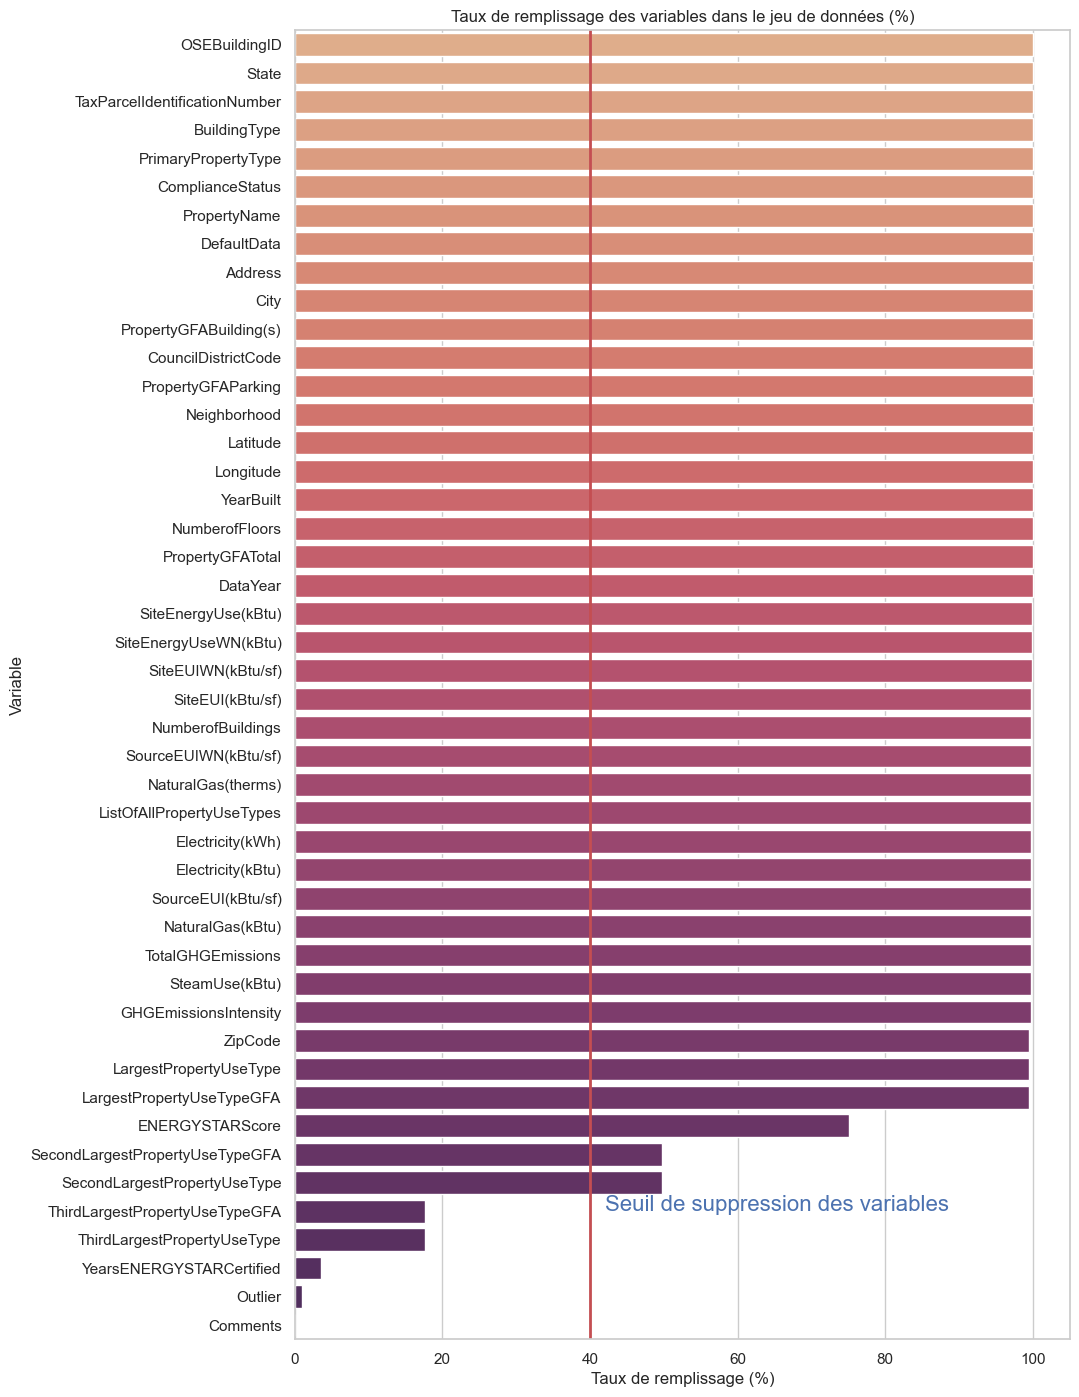

In [213]:
filling_features = null_factor(datas, 0)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

#Seuil de suppression
sup_threshold = 40

fig = plt.figure(figsize=(10, 17))

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 41, 'Seuil de suppression des variables', fontsize = 16, color = 'b')

plt.title("Taux de remplissage des variables dans le jeu de données (%)")
plt.xlabel("Taux de remplissage (%)")
plt.show()

In [214]:
datas_nan = datas.isna().sum().sort_values(ascending=False)
datas_nan

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
ZipCode                              16
ListOfAllPropertyUseTypes             9
SourceEUIWN(kBtu/sf)                  9
SourceEUI(kBtu/sf)                    9
Electricity(kWh)                      9
Electricity(kBtu)                     9
NaturalGas(therms)                    9
NaturalGas(kBtu)                      9
TotalGHGEmissions                     9
SteamUse(kBtu)                        9
GHGEmissionsIntensity                 9
NumberofBuildings                     8
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SiteEnergyUseWN(kBtu)                 6


**Comments                           3376**                                                 
Comments by a building owner or agent to provide context to the building’s energy use.

**Outlier                            3344**                               
Whether a property is a high or low outlier (Y/N)

**YearsENERGYSTARCertified           3257**                        
Years the property has received ENERGY STAR certification.

**ThirdLargestPropertyUseType        2780**  
The third largest use of a property (e.g. office, retail store) by GFA


**ThirdLargestPropertyUseTypeGFA     2780**    
The gross floor area (GFA) of the third largest use of the property.

**SecondLargestPropertyUseType        1697**        
The second largest use of a property (e.g. office, retail store) by GFA.

**SecondLargestPropertyUseTypeGFA     813**             
The gross floor area (GFA) of the second largest use of the property.

**ENERGYSTARScore                     574**            
An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.

In [215]:
# suppressions des variables avec NAN trop éléves
datas.drop([#'Outlier',
            'Comments', 
            'YearsENERGYSTARCertified'], axis=1, inplace=True)

In [216]:
datas.describe()

OSEBuildingID  DataYear      ZipCode  CouncilDistrictCode    Latitude  \
count     3376.00000    3376.0   3360.00000           3376.00000  3376.00000   
mean     21208.99111    2016.0  98116.94911              4.43928    47.62403   
std      12223.75701       0.0     18.61520              2.12063     0.04776   
min          1.00000    2016.0  98006.00000              1.00000    47.49917   
25%      19990.75000    2016.0  98105.00000              3.00000    47.59986   
50%      23112.00000    2016.0  98115.00000              4.00000    47.61867   
75%      25994.25000    2016.0  98122.00000              7.00000    47.65712   
max      50226.00000    2016.0  98272.00000              7.00000    47.73387   

        Longitude   YearBuilt  NumberofBuildings  NumberofFloors  \
count  3376.00000  3376.00000         3368.00000      3376.00000   
mean   -122.33480  1968.57316            1.10689         4.70912   
std       0.02720    33.08816            2.10840         5.49446   
min    -122.41425  1900.00000            0.00000         0.00000   
25%    -122.35066  1948.00000            1.00000         2.00000   
50%    -122.33249  1975.00000            1.00000         4.00000   
75%    -122.31941  1997.00000            1.00000         5.00000   
max    -122.22097  2015.00000          111.00000        99.00000   

       PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count       3.37600e+03          3376.00000             3.37600e+03   
mean        9.48335e+04          8001.52607             8.68320e+04   
std         2.18838e+05         32326.72393             2.07940e+05   
min         1.12850e+04             0.00000             3.63600e+03   
25%         2.84870e+04             0.00000             2.77560e+04   
50%         4.41750e+04             0.00000             4.32160e+04   
75%         9.09920e+04             0.00000             8.42762e+04   
max         9.32016e+06        512608.00000             9.32016e+06   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count                3.35600e+03                       1679.00000   
mean                 7.91776e+04                      28444.07582   
std                  2.01703e+05                      54392.91793   
min                  5.65600e+03                          0.00000   
25%                  2.50948e+04                       5000.00000   
50%                  3.98940e+04                      10664.00000   
75%                  7.62002e+04                      26640.00000   
max                  9.32016e+06                     686750.00000   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                       596.00000       2533.00000        3369.00000   
mean                      11738.67517         67.91867          54.73212   
std                       29331.19929         26.87327          56.27312   
min                           0.00000          1.00000           0.00000   
25%                        2239.00000         53.00000          27.90000   
50%                        5043.00000         75.00000          38.60000   
75%                       10138.75000         90.00000          60.40000   
max                      459748.00000        100.00000         834.40002   

       SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
count          3370.00000          3367.00000            3367.00000   
mean             57.03380           134.23285             137.78393   
std              57.16333           139.28755             139.10981   
min               0.00000             0.00000              -2.10000   
25%              29.40000            74.70000              78.40000   
50%              40.90000            96.20000             101.10000   
75%              64.27500           143.89999             148.35000   
max             834.40002          2620.00000            2620.00000   

       SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count          3.

In [217]:
datas.columns.sort_values().to_list()

['Address',
 'BuildingType',
 'City',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'GHGEmissionsIntensity',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'Latitude',
 'ListOfAllPropertyUseTypes',
 'Longitude',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'Outlier',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'State',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'TotalGHGEmissions',
 'YearBuilt',
 'ZipCode']

In [218]:
#plt.figure(figsize=(18,10))
#sns.heatmap(datas.isnull(), cbar=False)

In [219]:
#Lignes totalement vides
datas.dropna(how = 'all', axis=0, inplace=True)
datas.shape

(3376, 44)

In [220]:
datas[['ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',]].sample(10)

ENERGYSTARScore  Electricity(kBtu)  Electricity(kWh)
1203             43.0          1148350.0       3.36562e+05
408               NaN         12232122.0       3.58503e+06
467              15.0          2688675.0       7.88006e+05
1471             76.0          2251578.0       6.59900e+05
1598             72.0           868860.0       2.54648e+05
3115             61.0          5407602.0       1.58488e+06
386              62.0          1145957.0       3.35861e+05
1104             49.0           710939.0       2.08364e+05
3164             75.0          3422619.0       1.00311e+06
865              89.0          4410910.0       1.29276e+06

In [221]:
 datas[[
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ListOfAllPropertyUseTypes',
 ]].sample(10)

LargestPropertyUseType SecondLargestPropertyUseType  \
1472       Self-Storage Facility                          NaN   
1256              Medical Office                          NaN   
2032         Multifamily Housing                      Parking   
2068  Non-Refrigerated Warehouse                          NaN   
267                       Office                      Parking   
3130  Non-Refrigerated Warehouse                       Office   
1695         Multifamily Housing                          NaN   
1299         Multifamily Housing                 Retail Store   
2898         Multifamily Housing                          NaN   
2781    Residence Hall/Dormitory                          NaN   

               ListOfAllPropertyUseTypes  
1472               Self-Storage Facility  
1256                      Medical Office  
2032        Multifamily Housing, Parking  
2068          Non-Refrigerated Warehouse  
267                      Office, Parking  
3130  Non-Refrigerated Warehouse, Office  
1695                 Multifamily Housing  
1299   Multifamily Housing, Retail Store  
2898                 Multifamily Housing  
2781            Residence Hall/Dormitory

ListOfAllPropertyUseTypes = LargestPropertyUseType + SecondLargestPropertyUseType

In [222]:
 datas[[
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ENERGYSTARScore']].sample(10)

LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
2182                     9000.0                           9000.0   
442                    106003.0                          63782.0   
2934                    20000.0                              NaN   
2399                   134565.0                          35000.0   
506                     81385.0                              NaN   
1420                   112731.0                              NaN   
1134                     7245.0                           6644.0   
2047                    71000.0                              NaN   
2465                    58905.0                          14925.0   
1540                    24070.0                              NaN   

     ThirdLargestPropertyUseType  ENERGYSTARScore  
2182       Self-Storage Facility              NaN  
442                          NaN              NaN  
2934                         NaN             59.0  
2399               Swimming Pool              7.0  
506                          NaN              NaN  
1420                         NaN             42.0  
1134                       Other              NaN  
2047                         NaN            100.0  
2465                         NaN             76.0  
1540                         NaN              NaN

In [223]:
# Attention à ces 6 variables:
datas[[
 'SiteEUI(kBtu/sf)',
'SiteEUIWN(kBtu/sf)',
'SourceEUI(kBtu/sf)',
'SourceEUIWN(kBtu/sf)',
'SiteEnergyUse(kBtu)',
'SiteEnergyUseWN(kBtu)' 
]].sample(10)

SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
2919              18.8                19.5                59.0   
1858              28.1                29.6                88.3   
232               44.3                47.2               123.5   
1284              25.3                27.1                79.3   
1042              56.7                57.8               107.4   
2722              73.4                72.9               155.3   
1401              22.7                23.7                71.3   
1229               1.0                 1.0                 3.0   
54                65.9                67.1               144.5   
532                9.2                 9.2                28.8   

      SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  
2919              61.10000          4.39267e+05            4.54896e+05  
1858              92.90000          8.82759e+05            9.28744e+05  
232              129.39999          8.92178e+06            9.51049e+06  
1284              85.20000          5.40106e+05            5.80397e+05  
1042             110.90000          1.78815e+06            1.82320e+06  
2722             153.80000          3.18511e+06            3.16426e+06  
1401              74.40000          8.47800e+05            8.84494e+05  
1229               3.00000          2.41055e+04            2.41055e+04  
54               147.10001          5.82760e+06            5.94193e+06  
532               28.80000          1.01506e+06            1.01506e+06

In [224]:
datas[[
'SteamUse(kBtu)',
'Electricity(kWh)',
'Electricity(kBtu)',
'NaturalGas(therms)',
'NaturalGas(kBtu)',
'DefaultData',
'ComplianceStatus',
]].sample(10)

SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
1131             0.0       2.88821e+05           985457.0         14138.95996   
411              0.0       1.42293e+06          4855036.0             0.00000   
464              0.0       1.28214e+06          4374645.0             0.00000   
38               0.0       4.68840e+05          1599684.0         47994.43359   
550              0.0       4.95697e+06         16913185.0        195232.01560   
1210             0.0       2.47893e+05           845812.0         13874.50000   
1040             0.0       1.74671e+05           595978.0             0.00000   
2933             0.0       1.48879e+05           507976.0             0.00000   
3166             0.0       0.00000e+00                0.0         49936.19531   
678              0.0       8.78654e+04           299797.0          3691.19019   

      NaturalGas(kBtu)  DefaultData              ComplianceStatus  
1131         1413896.0        False                     Compliant  
411                0.0        False                     Compliant  
464                0.0        False                     Compliant  
38           4799443.0         True  Error - Correct Default Data  
550         19523202.0        False                     Compliant  
1210         1387450.0        False                     Compliant  
1040               0.0        False                     Compliant  
2933               0.0        False                     Compliant  
3166         4993620.0        False                  Missing Data  
678           369119.0        False                     Compliant

In [225]:
datas[[
'TotalGHGEmissions',
'GHGEmissionsIntensity'
]].sample(10)

TotalGHGEmissions  GHGEmissionsIntensity
166             1638.46                   1.75
2888              16.43                   0.75
1870              59.24                   1.21
2322             232.10                   2.23
3060              66.43                   3.01
3091               3.92                   0.19
1484             173.23                   0.28
942               21.55                   0.13
2345               5.42                   0.25
1360             167.98                   5.39

### Il semble ne pas avoir de relations entre: TotalGHGEmissions et	GHGEmissionsIntensity

In [226]:
datas[[
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors'
]].sample(10)

PropertyName                  Address     City  \
1386                   Alderview Apartments             300 11th Ave  Seattle   
896                    Spruce Street School         914 Virginia St.  Seattle   
1713                        Seventh & James         600 Seventh Ave.  Seattle   
1840                          ON THE BOARDS          100 West Roy St  Seattle   
771                                 Embassy           1420 Boren Ave  Seattle   
330                        Queen Anne Plaza     201 Queen Anne Ave N  Seattle   
1214  Rex Land Building (Block 56SE) - SEDO       401 8th Ave. North  Seattle   
412             Northwest Center Industries  7272 W. Marginal Way S.  Seattle   
2428                 LAUREN RENEE (ID25620)           312 E OLIVE PL  Seattle   
1551                1400 TAYLOR CONDOMINIUM        1400 Taylor Ave N  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
1386    WA  98122.0                    2197600700                    3   
896     WA  98101.0                    0660001365                    7   
1713    WA  98104.0                    8590400485                    3   
1840    WA  98119.0                    3879900640                    7   
771     WA  98101.0                    0660001855                    7   
330     WA  98109.0                    1989201010                    7   
1214    WA  98109.0                    1988201370                    7   
412     WA  98108.0                    2924049109                    1   
2428    WA  98122.0                    8725600045                    3   
1551    WA  98109.0                    2617550000                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
1386                   EAST  47.60457 -122.31773       1994   
896                DOWNTOWN  47.61687 -122.33533       1995   
1713                   EAST  47.60502 -122.32705       1991   
1840  MAGNOLIA / QUEEN ANNE  47.62591 -122.35843       1912   
771                    EAST  47.61309 -122.32839       1925   
330   MAGNOLIA / QUEEN ANNE  47.62003 -122.35706       1985   
1214             LAKE UNION  47.62231 -122.34145       1928   
412        GREATER DUWAMISH  47.53687 -122.33316       1989   
2428                   EAST  47.61721 -122.32710       1914   
1551  MAGNOLIA / QUEEN ANNE  47.63162 -122.34582       1984   

      NumberofBuildings  NumberofFloors  
1386                1.0               6  
896                 1.0               3  
1713                1.0               4  
1840                1.0               3  
771                 1.0               3  
330                 1.0               4  
1214                1.0               2  
412                 1.0               2  
2428                1.0               4  
1551                1.0               3

In [227]:
columns_to_categorize = ['DataYear', 'BuildingType', 'CouncilDistrictCode','Outlier', 'Neighborhood']

In [228]:
datas[columns_to_categorize] = datas[columns_to_categorize].astype('category')

<div class="alert alert-success">
    <font id="section_1_1">
    <h1 style="font-size:25px;"><strong>1.1. Colonnes et lignes vides</strong></h1>
</div>
Regardons à présent les variables qui comptent le plus de valeurs null:

### Le projet stipule que seuls les édifices qui ne sont pas destinés à l'habitation seront examinés. Ainsi, nous allons éliminer toutes les lignes relatives aux logements en utilisant la variable BuildingType comme référence.

In [229]:
#Column 2 BuildingType
Total = 0
value_counts = datas.BuildingType.value_counts()
for Type, count in value_counts.items():
    print(f"{Type:<25}: {count}")
    Total += count
print(f"Total:                     {Total}")

NonResidential           : 1460
Multifamily LR (1-4)     : 1018
Multifamily MR (5-9)     : 580
Multifamily HR (10+)     : 110
SPS-District K-12        : 98
Nonresidential COS       : 85
Campus                   : 24
Nonresidential WA        : 1
Total:                     3376


In [230]:
datas['BuildingType'].str.contains("Multifamily").value_counts()

True     1708
False    1668
Name: BuildingType, dtype: int64

In [231]:
datas = datas[~datas['BuildingType'].str.contains("Multifamily")]

In [232]:
Total = 0
value_counts = datas.BuildingType.value_counts()
for Type, count in value_counts.items():
    print(f"{Type:<25}: {count}")
    Total += count
print(f"Total:                     {Total}")

NonResidential           : 1460
SPS-District K-12        : 98
Nonresidential COS       : 85
Campus                   : 24
Nonresidential WA        : 1
Multifamily HR (10+)     : 0
Multifamily LR (1-4)     : 0
Multifamily MR (5-9)     : 0
Total:                     1668


In [233]:
#Column 11  
value_counts = datas.Neighborhood.value_counts().sort_index()
for Neighbor, count in value_counts.items():
    print(f"{Neighbor:<50} : {count:>5}")

BALLARD                                            :    64
Ballard                                            :     6
CENTRAL                                            :    51
Central                                            :     5
DELRIDGE                                           :    42
DELRIDGE NEIGHBORHOODS                             :     1
DOWNTOWN                                           :   361
Delridge                                           :     4
EAST                                               :   121
GREATER DUWAMISH                                   :   346
LAKE UNION                                         :   148
MAGNOLIA / QUEEN ANNE                              :   151
NORTH                                              :    58
NORTHEAST                                          :   128
NORTHWEST                                          :    81
North                                              :     9
Northwest                                          :    

In [234]:
datas['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
datas['Neighborhood']=datas['Neighborhood'].map(lambda x: x.upper())

<div class="alert alert-success">
    <font id="section_1_2">
    <h1 style="font-size:25px;"><strong>1.2 Suppresion de Doublons/ Variables</strong></h1>
</div>

In [235]:
datas.loc[datas[['OSEBuildingID']].duplicated(keep=False),:]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

 TaxParcelIdentificationNumber doit rester? Non, 

In [236]:
datas.loc[datas[['TaxParcelIdentificationNumber']].duplicated(keep=False),:]

OSEBuildingID DataYear        BuildingType          PrimaryPropertyType  \
69              103     2016  Nonresidential COS                        Other   
70              104     2016  Nonresidential COS                        Other   
71              106     2016  Nonresidential COS                        Other   
73              110     2016  Nonresidential COS                        Other   
74              111     2016  Nonresidential COS                        Other   
75              112     2016  Nonresidential COS                        Other   
107             174     2016  Nonresidential COS                        Other   
112             179     2016      NonResidential  Small- and Mid-Sized Office   
113             180     2016      NonResidential                        Other   
135             223     2016      NonResidential                 Retail Store   
136             224     2016      NonResidential                 Retail Store   
155             245     2016      NonResidential                        Other   
156             247     2016  Nonresidential COS          Distribution Center   
157             248     2016  Nonresidential COS                    Warehouse   
164             264     2016      NonResidential           Mixed Use Property   
170             276     2016      NonResidential                     Hospital   
202             323     2016      NonResidential  Small- and Mid-Sized Office   
258             385     2016      NonResidential                 Large Office   
259             386     2016      NonResidential                 Large Office   
260             387     2016      NonResidential                 Large Office   
261             388     2016      NonResidential                 Large Office   
262             389     2016      NonResidential                        Hotel   
269             396     2016      NonResidential                    Warehouse   
305             436     2016      NonResidential                        Other   
306             437     2016      NonResidential               Medical Office   
321             458     2016      NonResidential  Small- and Mid-Sized Office   
374             526     2016      NonResidential                 Large Office   
385             540     2016      NonResidential                    Warehouse   
386             543     2016      NonResidential          Distribution Center   
388             544     2016      NonResidential          Distribution Center   
390             546     2016      NonResidential                    Warehouse   
391             547     2016      NonResidential                    Warehouse   
433             594     2016      NonResidential                        Other   
460             621     2016      NonResidential                    Warehouse   
510             693     2016      NonResidential  Small- and Mid-Sized Office   
512             696     2016      NonResidential                 Large Office   
530             717     2016  Nonresidential COS                    Warehouse   
570             764     2016      NonResidential                 Large Office   
587             785     2016  Nonresidential COS                        Other   
592             793     2016      NonResidential                 Large Office   
597             799     2016      NonResidential          Distribution Center   
613             819     2016      NonResidential                 Retail Store   
638             867     2016      NonResidential  Supermarket / Grocery Store   
692           19613     2016      NonResidential  Small- and Mid-Sized Office   
775           19847     2016      NonResidential                 Retail Store   
776           19848     2016      NonResidential                 Retail Store   
785           19858     2016      NonResidential           Mixed Use Property   
786           19860     2016      NonResidential  Small- and Mid-Sized Office   
787           19861     2016      Non

<div class="alert alert-success">
    <font id="section_1_3">
    <h1 style="font-size:25px;"><strong>1.3 variables redondantes</strong></h1>
</div>

In [237]:
# suppressions des variables qui ne nous intéressent pas
datas.drop(['State',
            'ZipCode',
            'City'], axis=1, inplace=True)

In [238]:
#Suppression des variables avec suffixe WN
datas.drop(['SiteEUIWN(kBtu/sf)',
           # 'SiteEnergyUseWN(kBtu)',
            'SourceEUIWN(kBtu/sf)'], axis=1, inplace=True)

In [239]:
#Suppression des variables redondantes
datas.drop(['NaturalGas(therms)',
            'Electricity(kWh)'], axis=1, inplace=True)

In [240]:
# Column 42  ComplianceStatus  
Total = 0
value_counts = datas.ComplianceStatus.value_counts().sort_index()
for Compli, count in value_counts.items():
    print(f"{Compli:<50} : {count:>5}")
    Total += count
print(f"Total:                                                {Total}")

Compliant                                          :  1548
Error - Correct Default Data                       :    88
Missing Data                                       :    14
Non-Compliant                                      :    18
Total:                                                1668


In [241]:
datas['ComplianceStatus'].replace('Error - Correct Default Data', np.nan, inplace=True)
datas['ComplianceStatus'].replace('Missing Data', np.nan, inplace=True)
datas['ComplianceStatus'].replace('Non-Compliant', np.nan, inplace=True)

In [242]:
# Column 42  ComplianceStatus  
Total = 0
value_counts = datas.ComplianceStatus.value_counts().sort_index()
for Compli, count in value_counts.items():
    print(f"{Compli:<50} : {count:>5}")
    Total += count
print(f"Total:                                                {Total}")

Compliant                                          :  1548
Total:                                                1548


In [243]:
datas.shape

(1668, 37)

Aqui empieza 2

<div class="alert alert-success">
    <font id="section_2">
    <h1 style="font-size:25px;"><strong>02. Explication des variables</strong></h1>
</div>

* <a href="https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy" target="_blank">Lien vers la signification des variables: </a>

Plusieurs variables concernent les surfaces (**GFA** = Gross floor area) :

* **Gross floor area** : surface totale
* **PropertyGFAParking** : surface des parkings
* **PropertyGFABuilding(s)** : surface des bâtiments
* **ListOfAllPropertyUseTypes** : les différentes utilisations des surfaces (Hotel, Parking, Restaurant, Piscine, etc.)
* **LargestPropertyUseType / LargestPropertyUseTypeGFA** : principale destination du bâtiment et sa surface
* **SecondLargestPropertyUseType / SecondLargestPropertyUseTypeGFA** : seconde destination du bâtiment et sa surface
* **ThirdLargestPropertyUseType / ThirdLargestPropertyUseTypeGFA** : troisième destination du bâtiment et sa surface

Concernant l'énergie, ENERGY STAR nous indique :

* **SiteEUI(kBtu/sf) / SiteEUIWN(kBtu/sf)** :                     
Energy Use Intensity (EUI) ou intensité de la consommation d'énergie ; l'EUI exprime la consommation d'énergie d'un bâtiment en fonction de sa taille ou d'autres caractéristiques.                          

* **SourceEUI(kBtu/sf) SourceEUIWN(kBtu/sf)** :                           
la source d'énergie est l'unité d'évaluation la plus équitable pour comparer différents bâtiments entre eux. La source d'énergie représente la quantité totale de combustible brut nécessaire au fonctionnement du bâtiment. Il intègre toutes les pertes de transmission, de livraison et de production. En prenant en compte toutes les consommations d'énergie, le score fournit une évaluation complète de l'efficacité énergétique d'un bâtiment.

> SiteEnergyUse(kBtu)                     
> SiteEnergyUseWN(kBtu)                                  
SteamUse(kBtu)                         
Electricity(kWh)                                 
Electricity(kBtu)                                  
NaturalGas(therms)                             
NaturalGas(kBtu) :                                         
l'utilisation des énergies est exprimée en diverses unités :

* **kBTu** : le B.T.U. (British Thermal Unit) est une unité de mesure d'énergie thermique. Le BTU, de symbole Btu, est utilisé dans les pays anglo-saxons et asiatiques et équivaut à 1055,06 Joule ou 252 calories.                                 
* **1 BTU** est l’énergie nécessaire pour chauffer ou refroidir une livre d’eau de 1 degré Fahrenheit au niveau de la mer.
Pour convertir une puissance en Btu une puissance en watt il suffit de diviser la puissance en Btu par 3414,5 pour obtenir la puissance en Kw.

* therms : le therm est une unité d'énergie thermique anglo-saxone égale à 1 000 000 unités thermiques britanniques (BTU).

> 1 kWh = 0.034095106405145 thm                                            
> thm = 29.329722222222 kWh

Supprimons les colonnes qui ne nous intéressent pas dans ce projet :

State (une seule valeur) Comments les variables qui se terminent par **WN** (Weather Normalized) qui sont des corrections des conditions climatiques. 

D'autres variables sont redondantes :                                   
> Electricity(kWh)                       
Electricity(kBtu)                                       
NaturalGas(therms)                                   
NaturalGas(kBtu)

Aqui termina 2

<div class="alert alert-success">
    <font id="section_3">
    <h1 style="font-size:25px;"><strong>03. Compléter les valeurs manquantes ou aberrantes</strong></h1>
</div>

In [244]:
numeric_columns = datas.select_dtypes(include = ['float64','int64']).min()
numeric_columns

OSEBuildingID                           1.00000
Latitude                               47.49917
Longitude                            -122.41182
YearBuilt                            1900.00000
NumberofBuildings                       0.00000
NumberofFloors                          0.00000
PropertyGFATotal                    11285.00000
PropertyGFAParking                      0.00000
PropertyGFABuilding(s)               3636.00000
LargestPropertyUseTypeGFA            5656.00000
SecondLargestPropertyUseTypeGFA         0.00000
ThirdLargestPropertyUseTypeGFA          0.00000
ENERGYSTARScore                         1.00000
SiteEUI(kBtu/sf)                        0.00000
SourceEUI(kBtu/sf)                      0.00000
SiteEnergyUse(kBtu)                     0.00000
SiteEnergyUseWN(kBtu)                   0.00000
SteamUse(kBtu)                          0.00000
Electricity(kBtu)                 -115417.00000
NaturalGas(kBtu)                        0.00000
TotalGHGEmissions                      -

**kBtu** = kilo british termal unit Il y a des valeurs négatives mais les bâtiments producteurs d'énergie existent, pas de suppression de valeurs négative à ce stade

In [245]:
datas.select_dtypes(include = ['float64','int64']).describe()

OSEBuildingID    Latitude   Longitude   YearBuilt  NumberofBuildings  \
count     1668.00000  1668.00000  1668.00000  1668.00000         1666.00000   
mean     16336.34652    47.61605  -122.33291  1961.91367            1.16867   
std      13835.29251     0.04817     0.02458    32.74176            2.93141   
min          1.00000    47.49917  -122.41182  1900.00000            0.00000   
25%        582.75000    47.58546  -122.34328  1930.00000            1.00000   
50%      21143.50000    47.61234  -122.33293  1965.00000            1.00000   
75%      24602.25000    47.64968  -122.32167  1989.00000            1.00000   
max      50226.00000    47.73387  -122.25864  2015.00000          111.00000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count      1668.00000       1.66800e+03          1668.00000   
mean          4.12110       1.18843e+05         12897.97902   
std           6.56341       2.97362e+05         42274.51119   
min           0.00000       1.12850e+04             0.00000   
25%           1.00000       2.94778e+04             0.00000   
50%           2.00000       4.92895e+04             0.00000   
75%           4.00000       1.05325e+05             0.00000   
max          99.00000       9.32016e+06        512608.00000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count             1.66800e+03                1.66200e+03   
mean              1.05945e+05                9.87647e+04   
std               2.84212e+05                2.76711e+05   
min               3.63600e+03                5.65600e+03   
25%               2.84752e+04                2.55275e+04   
50%               4.73915e+04                4.37705e+04   
75%               9.47598e+04                9.19838e+04   
max               9.32016e+06                9.32016e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                        855.00000                       353.00000   
mean                       36804.16058                     14923.13994   
std                        69845.26102                     36790.55656   
min                            0.00000                         0.00000   
25%                         5350.00000                      2663.00000   
50%                        12000.00000                      5931.00000   
75%                        31881.00000                     12941.00000   
max                       686750.00000                    459748.00000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
count       1094.00000        1665.00000          1666.00000   
mean          65.44973          72.15880           175.82989   
std           28.49293          74.04813           185.93212   
min            1.00000           0.00000             0.00000   
25%           48.00000          33.70000            76.45000   
50%           73.00000          51.90000           130.95000   
75%           89.00000          81.70000           203.95000   
max          100.00000         834.40002          2620.00000   

       SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count          1.66600e+03            1.66500e+03     1.66600e+03   
mean           8.43793e+06            8.06479e+06     5.12573e+05   
std            3.02438e+07            2.20388e+07     5.51394e+06   
min            0.00000e+00            0.00000e+00     0.00000e+00   
25%            1.22929e+06            1.29462e+06     0.00000e+00   
50%            2.55495e+06            2.68515e+06     0.00000e+00   
75%            6.91335e+06            7.10971e+06     0.00000e+00   
max            8.73924e+08            4.71614e+08     1.34943e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
count        1.66600e+03       1.66600e+03          1666.0000   
mean         5.84349e+06       1.97084e+06           184.9733   
std          2.07967e+07       9.37081e+06           751.9760   
min         -1.15417e+05       0.00000e+00            -0.800

### Suppression des outliers

In [246]:
from sklearn.neighbors import KDTree

for column in datas.select_dtypes(include = ['int32','float64']).columns.tolist() :
    "outliers aux extrémités des distributions"
    datas.loc[datas[column] > datas[column].quantile(0.995)] = np.nan
    datas.loc[datas[column] < datas[column].quantile(0.005)] = np.nan
print(datas.shape)
    
#outliers éloignés par rapport à leurs voisins
numeric_data = datas.select_dtypes(['int32', 'float64']).copy().dropna()
print(numeric_data.shape)
kdt = KDTree(numeric_data, leaf_size = 40, metric='minkowski')

dist, ind = kdt.query(numeric_data, k=3, return_distance=True)
numeric_data['3N_distance'] = np.sum(dist, axis=1)    
numeric_data = numeric_data[numeric_data['3N_distance'] < numeric_data['3N_distance'].quantile(0.99)]
index_to_drop = numeric_data.index.tolist()

datas = datas.drop(index_to_drop, axis=0)
    

(1668, 37)
(135, 22)


### Correction du nombre de bâtiments et d'étages (ne peut être nul ou NaN)

In [247]:
datas['NumberofBuildings'].fillna(0, inplace=True)
datas['NumberofBuildings'].replace(0, 1, inplace=True)

datas['NumberofFloors'].fillna(0, inplace=True)
datas['NumberofFloors'].replace(0, 1, inplace=True)

### Question 
### Sur les Emissions:                  
TotalGHGEmissions                **-0.80000**                                     
GHGEmissionsIntensity            **-0.02000**

### TotalGHGEmissions:
The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources.       

This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. 
Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

### GHGEmissionsIntensity                 
Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources


In [248]:
# Column 44  TotalGHGEmissions
# Filtrer les valeurs plus petits que cero et NaN
valores_invalidos = datas.loc[(datas['TotalGHGEmissions'] < 0) | (datas['TotalGHGEmissions'].isnull())]

# Mostrer les valeurs 
valores_invalidos .head()

OSEBuildingID DataYear BuildingType PrimaryPropertyType PropertyName  \
2             NaN      NaN          NaN                 NaN          NaN   
17            NaN      NaN          NaN                 NaN          NaN   
20            NaN      NaN          NaN                 NaN          NaN   
21            NaN      NaN          NaN                 NaN          NaN   
28            NaN      NaN          NaN                 NaN          NaN   

   Address TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood  \
2      NaN                           NaN                 NaN          NaN   
17     NaN                           NaN                 NaN          NaN   
20     NaN                           NaN                 NaN          NaN   
21     NaN                           NaN                 NaN          NaN   
28     NaN                           NaN                 NaN          NaN   

    Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
2        NaN        NaN        NaN                1.0             1.0   
17       NaN        NaN        NaN                1.0             1.0   
20       NaN        NaN        NaN                1.0             1.0   
21       NaN        NaN        NaN                1.0             1.0   
28       NaN        NaN        NaN                1.0             1.0   

    PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
2                NaN                 NaN                     NaN   
17               NaN                 NaN                     NaN   
20               NaN                 NaN                     NaN   
21               NaN                 NaN                     NaN   
28               NaN                 NaN                     NaN   

   ListOfAllPropertyUseTypes LargestPropertyUseType  \
2                        NaN                    NaN   
17                       NaN                    NaN   
20                       NaN                    NaN   
21                       NaN                    NaN   
28                       NaN                    NaN   

    LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
2                         NaN                          NaN   
17                        NaN                          NaN   
20                        NaN                          NaN   
21                        NaN                          NaN   
28                        NaN                          NaN   

    SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2                               NaN                         NaN   
17                              NaN                         NaN   
20                              NaN                         NaN   
21                              NaN                         NaN   
28                              NaN                         NaN   

    ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
2                              NaN              NaN               NaN   
17                             NaN              NaN               NaN   
20                             NaN              NaN               NaN   
21                             NaN              NaN               NaN   
28                             NaN              NaN               NaN   

    SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
2                  NaN                  NaN                    NaN   
17                 NaN                  NaN                    NaN   
20                 NaN                  NaN                    NaN   
21                 NaN                  NaN                    NaN   
28                 NaN                  NaN                    NaN   

    SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu) DefaultData  \
2              NaN                NaN               NaN         NaN   
17             NaN                NaN               NaN         NaN   
20             NaN                NaN               NaN 

Attention à: >=   

In [249]:
# Eliminer les valeurs plus petits que cero et NaN
datas = datas.loc[datas['TotalGHGEmissions'] >= 0].dropna(subset=['TotalGHGEmissions'])
#datas = datas.loc[datas['TotalGHGEmissions'] <= 0].dropna(subset=['TotalGHGEmissions'])

In [250]:
# column 45  GHGEmissionsIntensity
# Filtrer les valeurs plus petits que cero et NaN

valores_invalidos = datas.loc[(datas['GHGEmissionsIntensity'] < 0)]

# Montrer les valeurs filtres
valores_invalidos

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), DefaultData, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

In [251]:
numeric_columns = datas.select_dtypes(include = ['float64','int64']).max()
numeric_columns

OSEBuildingID                      5.02260e+04
Latitude                           4.77280e+01
Longitude                         -1.22266e+02
YearBuilt                          2.01500e+03
NumberofBuildings                  6.00000e+00
NumberofFloors                     9.90000e+01
PropertyGFATotal                   1.24906e+06
PropertyGFAParking                 4.07795e+05
PropertyGFABuilding(s)             1.04793e+06
LargestPropertyUseTypeGFA          9.83697e+05
SecondLargestPropertyUseTypeGFA    3.33698e+05
ThirdLargestPropertyUseTypeGFA     1.03200e+05
ENERGYSTARScore                    1.00000e+02
SiteEUI(kBtu/sf)                   3.44100e+02
SourceEUI(kBtu/sf)                 7.81300e+02
SiteEnergyUse(kBtu)                5.11683e+07
SiteEnergyUseWN(kBtu)              4.12259e+07
SteamUse(kBtu)                     7.81566e+06
Electricity(kBtu)                  3.79807e+07
NaturalGas(kBtu)                   1.28957e+07
TotalGHGEmissions                  7.80840e+02
GHGEmissionsI

### Localisation

In [252]:
import folium
map_osm = folium.Map()
map_osm = folium.Map(location=[datas['Latitude'].mean(), datas['Longitude'].mean()],zoom_start=11)
for i in range(0,len(datas)):
    folium.Circle([datas.iloc[i]['Latitude'],datas.iloc[i]['Longitude']], 
                      popup=datas.iloc[i]['Address'], radius =100).add_to(map_osm)
map_osm

### Les bâtiments sont localisés dans Seattle.

<Axes: >

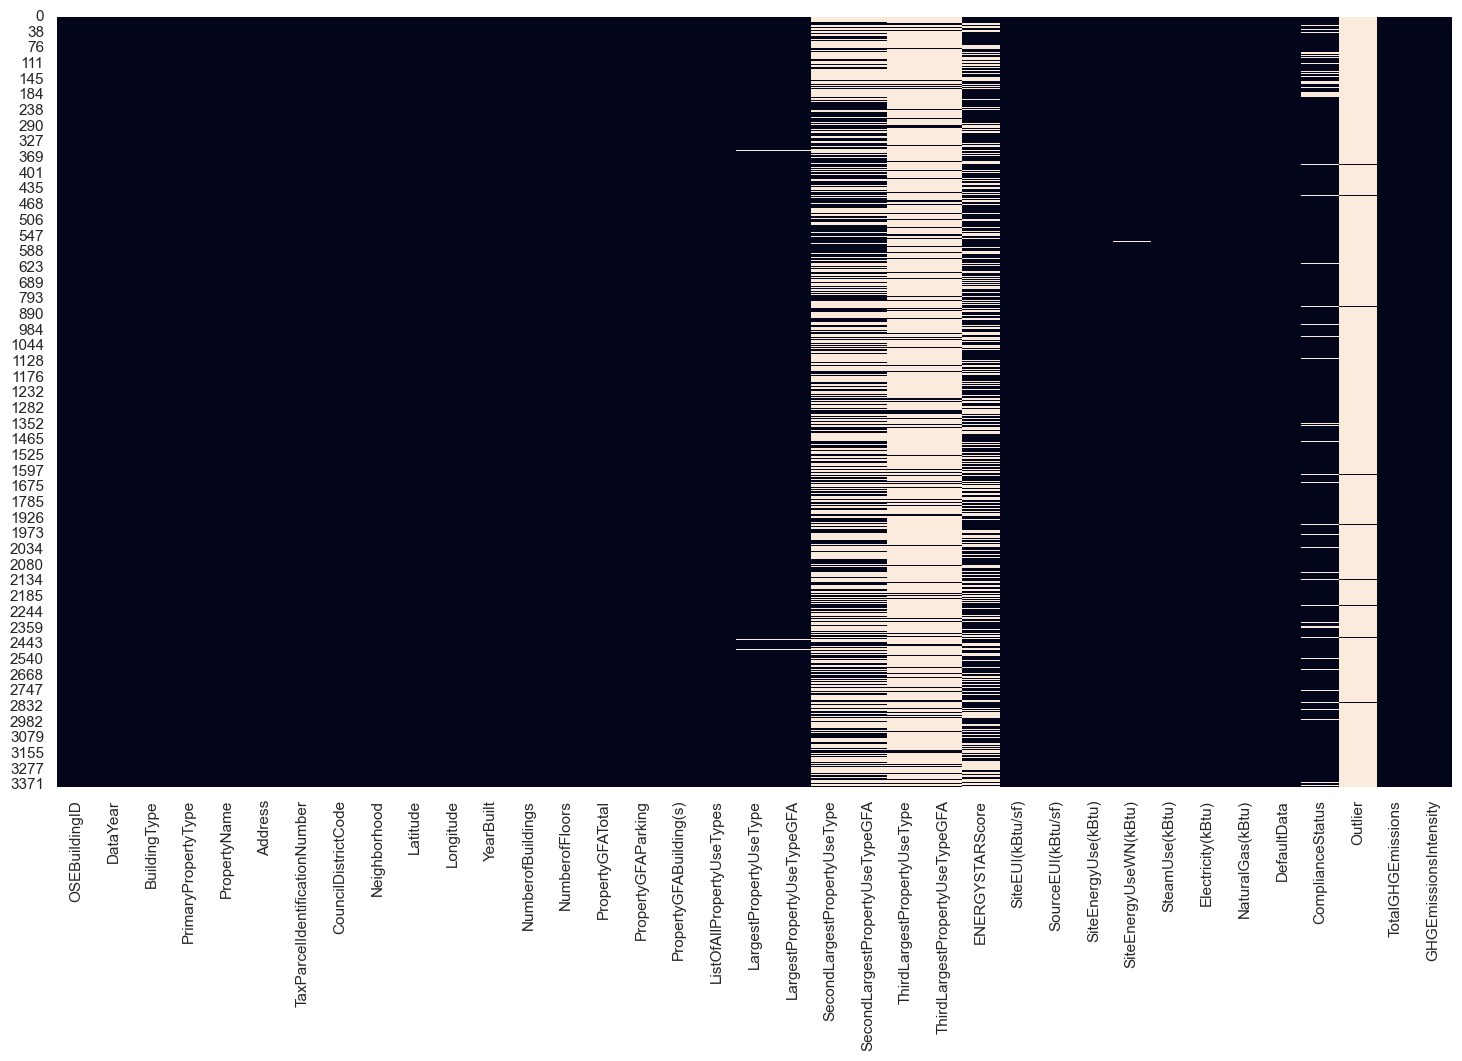

In [253]:
plt.figure(figsize=(18,10))
sns.heatmap(datas.isnull(), cbar=False)

In [254]:
datas_nan = datas.isna().sum().sort_values(ascending=False)
datas_nan

Outlier                            1364
ThirdLargestPropertyUseType        1204
ThirdLargestPropertyUseTypeGFA     1204
SecondLargestPropertyUseType        741
SecondLargestPropertyUseTypeGFA     741
ENERGYSTARScore                     497
ComplianceStatus                     98
LargestPropertyUseTypeGFA             4
LargestPropertyUseType                4
SiteEnergyUseWN(kBtu)                 1
SteamUse(kBtu)                        0
SiteEnergyUse(kBtu)                   0
SourceEUI(kBtu/sf)                    0
SiteEUI(kBtu/sf)                      0
Electricity(kBtu)                     0
NaturalGas(kBtu)                      0
DefaultData                           0
TotalGHGEmissions                     0
OSEBuildingID                         0
DataYear                              0
ListOfAllPropertyUseTypes             0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0


In [255]:
#effacer
datas.columns.to_list()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

### Quels paramètres doivent être maintenus pour la prédiction ? Quels éléments doivent être conservés pour la prédiction ?

**Liste des différentes colonnes énergétiques:**
* SiteEUI(kBtu/sf) - Site Energy Use Intensity (EUI) is a property's Site Energy Use 
* SiteEUIWN(kBtu/sf) - Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area
* SourceEUI(kBtu/sf) - Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area 
* SourceEUIWN(kBtu/sf) - Weather Normalized (WN) Site Energy Use Intensity (EUI)
* SiteEnergyUse(kBtu) - The annual amount of energy consumed by the property from all sources of energy.
* **SiteEnergyUseWN(kBtu)** - The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions.
* SteamUse(kBtu) - The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).
* Electricity(kWh) - The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh
* Electricity(kBtu) - The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
* NaturalGas(therms) - The annual amount of utility-supplied natural gas consumed by the property, measured in therms
* NaturalGas(kBtu) - The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).
* OtherFuelUse(kBtu) - 

**Liste des différentes colonnes pour les émissions**
* **TotalGHGEmissions**
* GHGEmissionsIntensity

### Veuillez noter qu'il y a une contradiction entre le titre du projet et la consigne : le titre mentionne la consommation électrique tandis que la consigne parle de consommation totale.

In [256]:
datas.drop(['PropertyName',
            'Address',
            'TaxParcelIdentificationNumber',
            'SiteEUI(kBtu/sf)',
            'SourceEUI(kBtu/sf)',
            'SteamUse(kBtu)',
            'Electricity(kBtu)',
            'NaturalGas(kBtu)',
            'DefaultData',
            'SiteEnergyUse(kBtu)',
            'ComplianceStatus'], axis=1, inplace=True)


In [257]:
datas.columns.to_list()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [258]:
datas_nan = datas.isna().sum().sort_values(ascending=False)
datas_nan

Outlier                            1364
ThirdLargestPropertyUseTypeGFA     1204
ThirdLargestPropertyUseType        1204
SecondLargestPropertyUseTypeGFA     741
SecondLargestPropertyUseType        741
ENERGYSTARScore                     497
LargestPropertyUseTypeGFA             4
LargestPropertyUseType                4
SiteEnergyUseWN(kBtu)                 1
OSEBuildingID                         0
DataYear                              0
TotalGHGEmissions                     0
ListOfAllPropertyUseTypes             0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
NumberofFloors                        0
NumberofBuildings                     0
YearBuilt                             0
Longitude                             0
Latitude                              0
Neighborhood                          0
CouncilDistrictCode                   0
PrimaryPropertyType                   0
BuildingType                          0


### Complétion des NaN par des valeurs quand applicable                          

Quand NaN pour usage ou other fuel use : valeur 0

In [259]:
datas[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']] = datas[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']].fillna(0, )

Quand NaN pour le type d'usage suppléentaire : création d'un nouveau type "no use"

In [260]:
datas[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']] = datas[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']].fillna('No Use')

In [261]:
datas['LargestPropertyUseType'] = datas['LargestPropertyUseType'].fillna('No information')

In [262]:
datas[datas['LargestPropertyUseType'] == 'No information']

OSEBuildingID DataYear    BuildingType          PrimaryPropertyType  \
353           496.0     2016  NonResidential        Self-Storage Facility   
1147        21103.0     2016  NonResidential                        Hotel   
2414        25568.0     2016  NonResidential  Small- and Mid-Sized Office   
2459        25711.0     2016  NonResidential                   Restaurant   

     CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
353                    6      BALLARD  47.66838 -122.39310     1946.0   
1147                   7     DOWNTOWN  47.61203 -122.34165     1910.0   
2414                   4   LAKE UNION  47.64747 -122.34086     2008.0   
2459                   2     DOWNTOWN  47.59697 -122.32474     1913.0   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
353                 2.0             2.0          111445.0                 0.0   
1147                1.0             8.0           61721.0                 0.0   
2414                1.0             4.0           48350.0                 0.0   
2459                1.0             3.0           28800.0                 0.0   

      PropertyGFABuilding(s)  \
353                 111445.0   
1147                 61721.0   
2414                 48350.0   
2459                 28800.0   

                                                            ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other - Education, Other - Recreatio...   
1147                                                                            Hotel   
2414                                                                           Office   
2459                                                                       Restaurant   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353          No information                        NaN   
1147         No information                        NaN   
2414         No information                        NaN   
2459         No information                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
353                        No Use                              0.0   
1147                       No Use                              0.0   
2414                       No Use                              0.0   
2459                       No Use                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
353                       No Use                             0.0   
1147                      No Use                             0.0   
2414                      No Use                             0.0   
2459                      No Use                             0.0   

      ENERGYSTARScore  SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  \
353               NaN            6.07696e+06     NaN             163.83   
1147             93.0            2.96843e+06     NaN              36.92   
2414             45.0            3.28096e+06     NaN              22.09   
2459              NaN            9.35833e+05     NaN              29.21   

      GHGEmissionsIntensity  
353                    1.47  
1147                   0.60  
2414                   0.46  
2459                   1.01

In [263]:
datas['Outlier'].replace('Low outlier', 'Low Outlier', inplace=True)
datas['Outlier'].replace('High outlier', 'High Outlier', inplace=True)

datas['Outlier'] = datas['Outlier'].astype('object')
datas['Outlier'].fillna('Normal', inplace=True)
datas['Outlier'] = datas['Outlier'].astype('category')

In [264]:
datas.isna().sum().sort_values()

OSEBuildingID                        0
Outlier                              0
ThirdLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA      0
SecondLargestPropertyUseType         0
LargestPropertyUseType               0
ListOfAllPropertyUseTypes            0
PropertyGFABuilding(s)               0
TotalGHGEmissions                    0
PropertyGFATotal                     0
PropertyGFAParking                   0
NumberofBuildings                    0
YearBuilt                            0
Longitude                            0
Latitude                             0
Neighborhood                         0
CouncilDistrictCode                  0
PrimaryPropertyType                  0
BuildingType                         0
DataYear                             0
NumberofFloors                       0
GHGEmissionsIntensity                0
SiteEnergyUseWN(kBtu)                1
LargestPropertyUseTypeGFA            4
ENERGYSTARScore          

In [265]:
datas.shape

(1375, 26)

<div class="alert alert-success">
    <font id="section_4">
    <h1 style="font-size:25px;"><strong>04. Analisis univariée</strong></h1>
</div>

<Axes: >

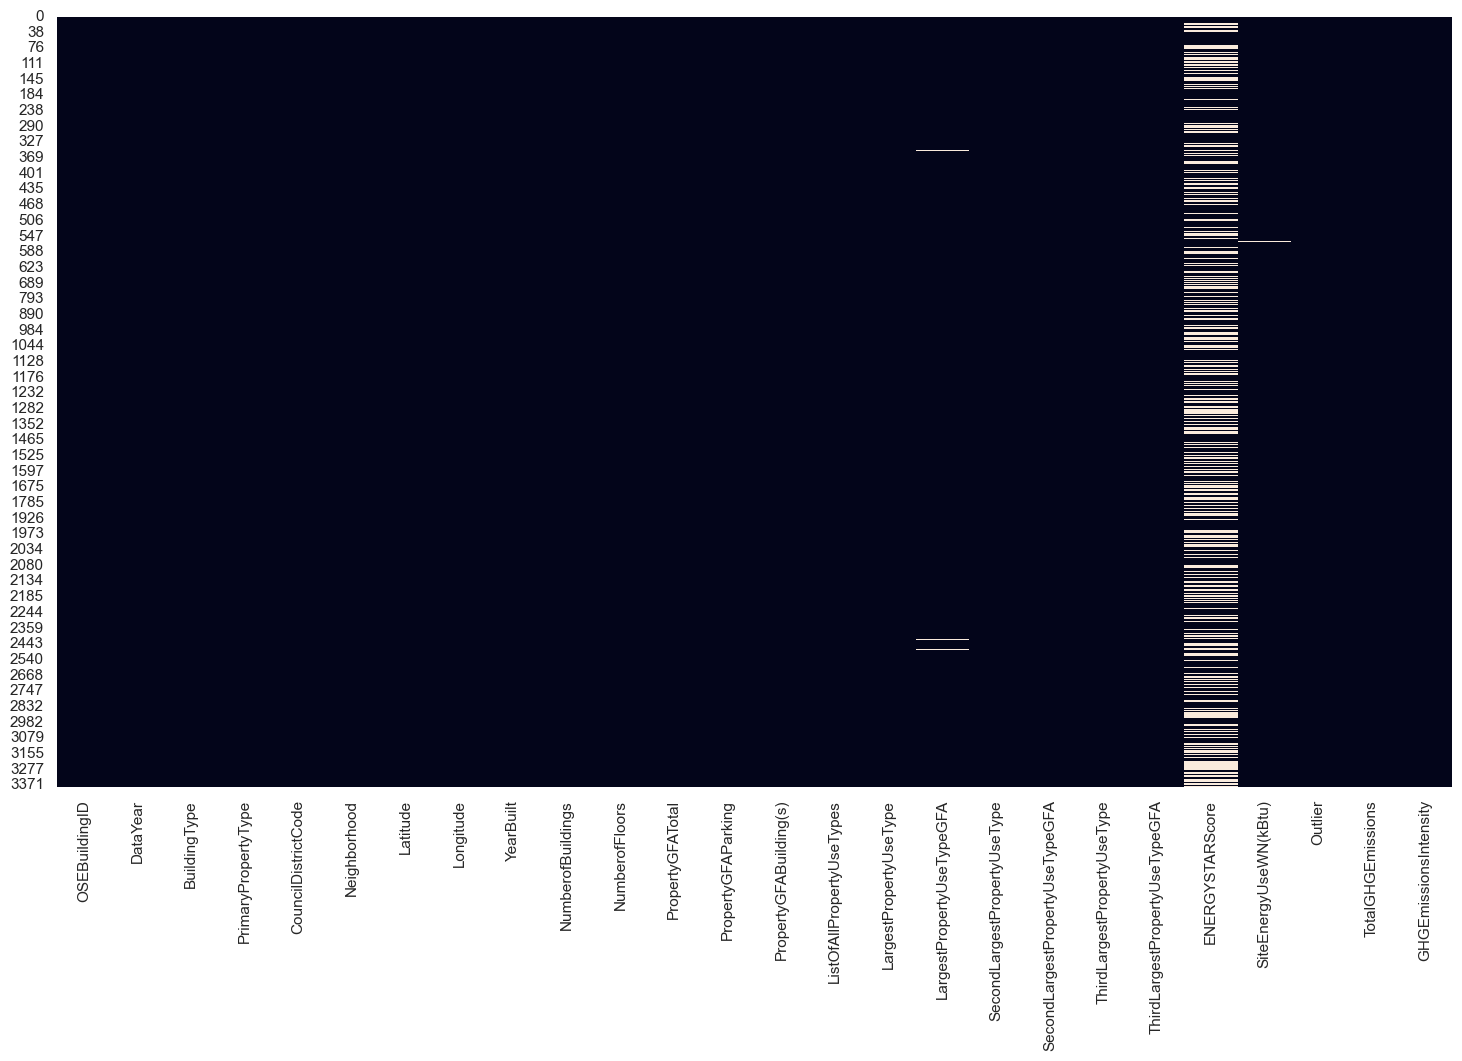

In [266]:
plt.figure(figsize=(18,10))
sns.heatmap(datas.isnull(), cbar=False)

In [267]:
numerical_features = list(datas.select_dtypes(include=["float64","int64"]).columns)
numerical_features

['OSEBuildingID',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [268]:
var_to_hist = [
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
  #'TotalUseTypeNumber'
]

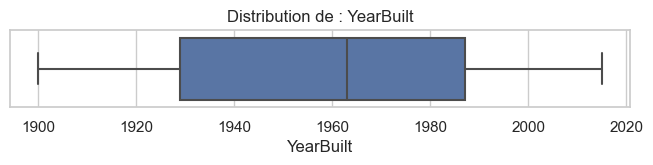

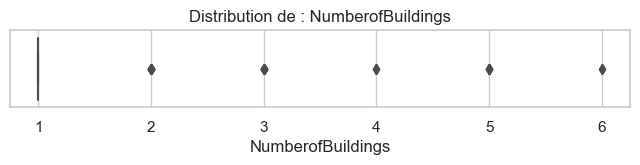

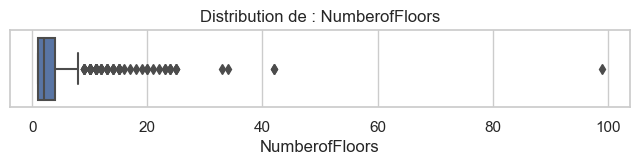

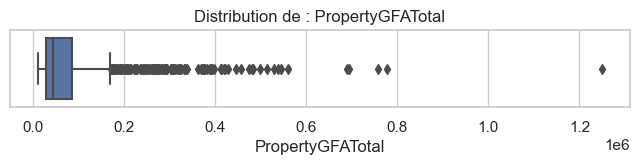

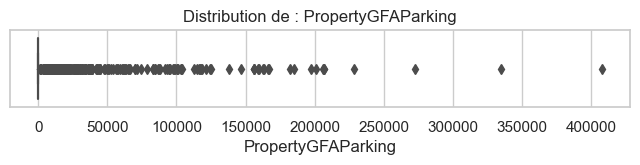

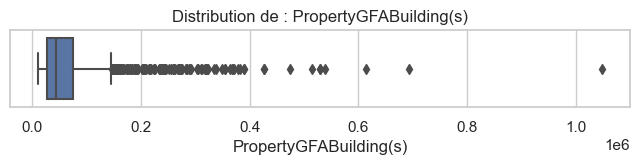

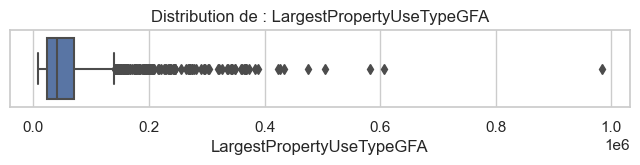

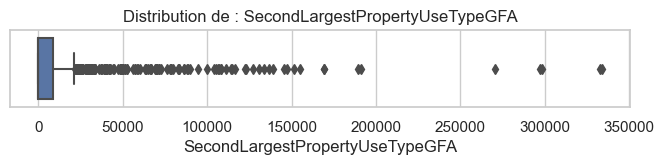

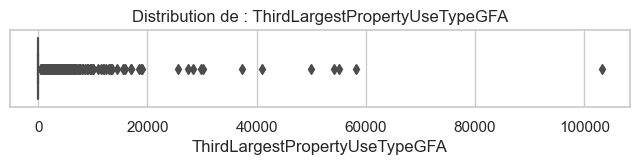

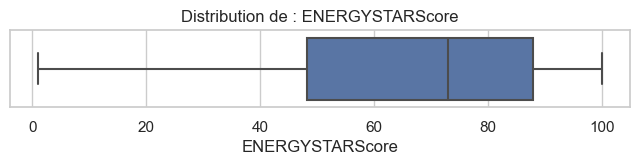

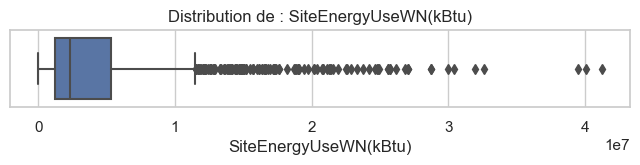

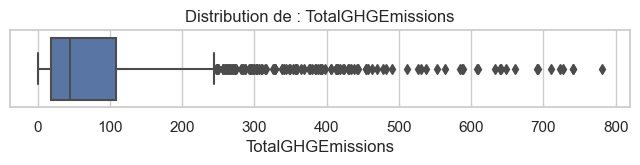

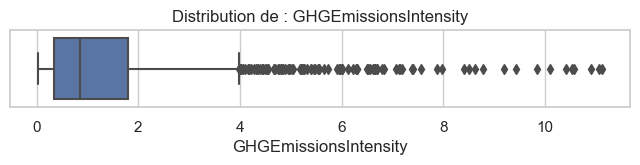

In [269]:
for column in var_to_hist:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=datas[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

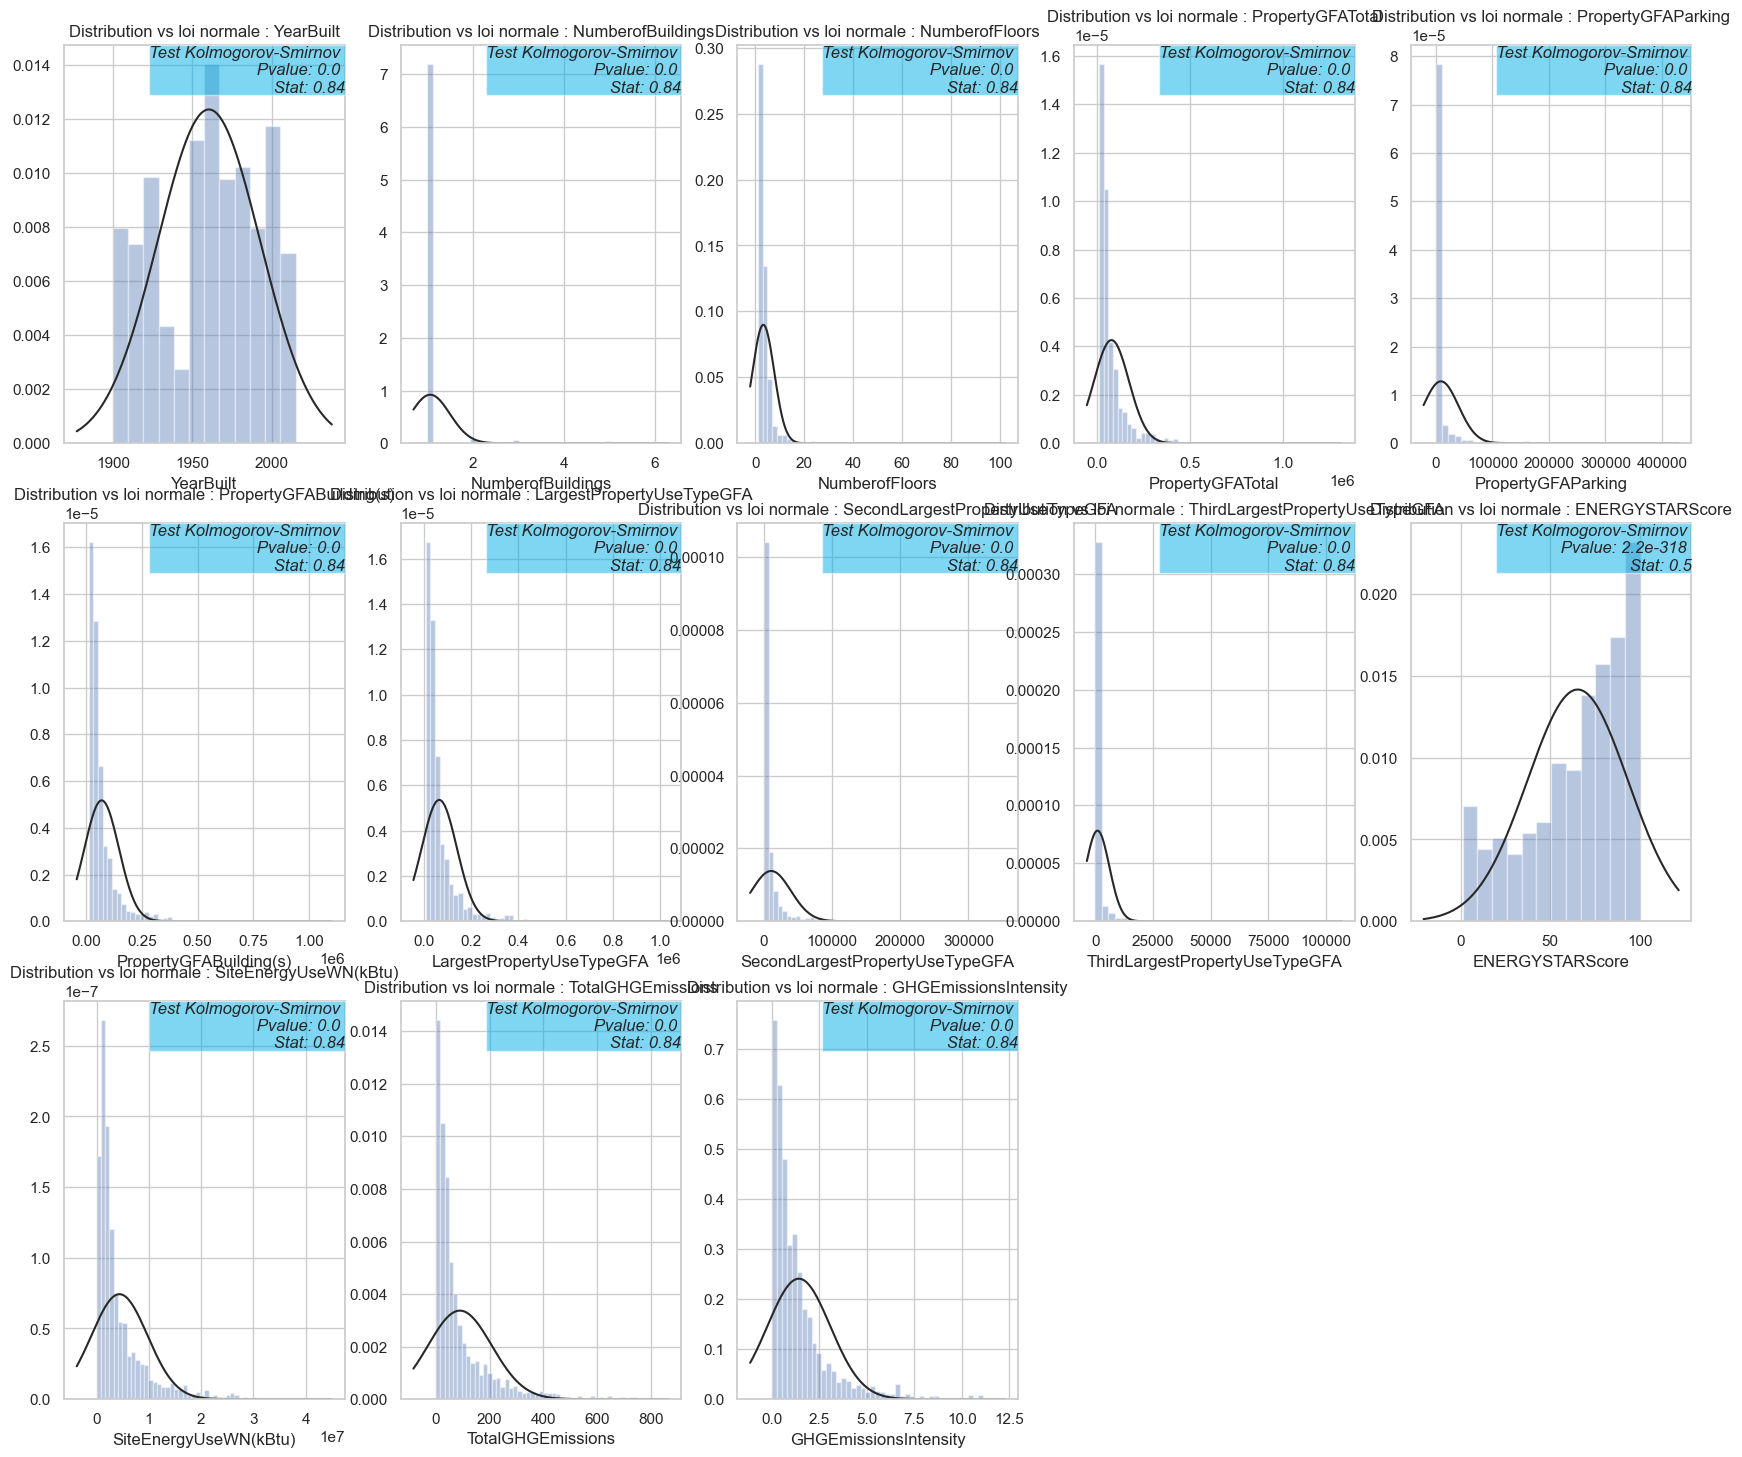

In [270]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0


#for i in range(len(numerical_features)):
for i in range(len(var_to_hist)):    
    #fig.add_subplot(4,3,i+1)
    fig.add_subplot(5,5,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    #colonne = numerical_features[i]
    colonne = var_to_hist[i]
    kstest = stats.kstest(datas[colonne].notnull(),'norm')
    ax = sns.distplot(datas[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

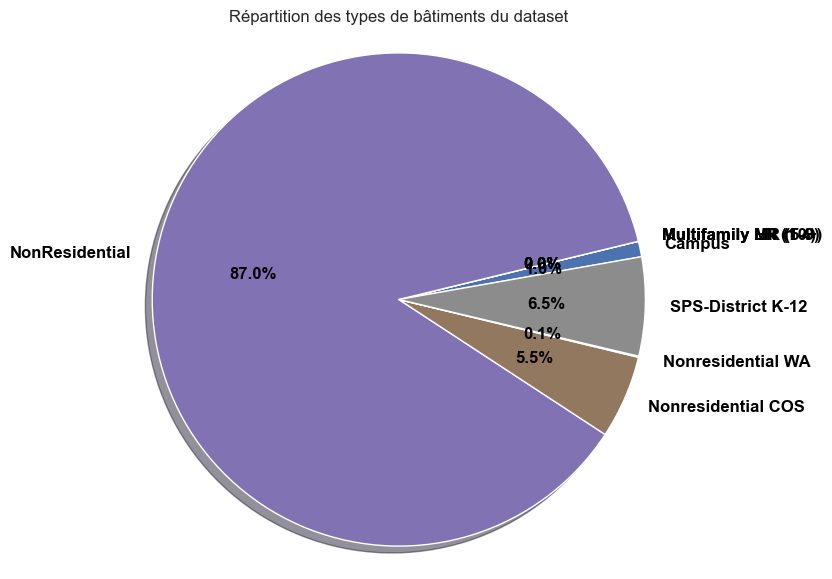

In [271]:
building_type = datas.groupby(by='BuildingType')['OSEBuildingID'].nunique()
#myexplode = [0.01, 0.01, 0.01, 0.01]  explode = myexplode,

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=10,
       textprops=dict(color="black",size=12, weight="bold",
       ))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du dataset")
plt.show()

In [272]:
#This function allows you to view the distribution 
#of CO2 emissions within the classes of a variable.
def visualisation(variable,df):
    # the_mean=df["GHGEmissions(MetricTonsCO2e)"].mean()
    the_mean=df["TotalGHGEmissions"].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.title("C02 emissions distribution by {}".format(variable),size=16)
    sns.boxplot(x=variable, y="TotalGHGEmissions", data=df,color="#cbd1db",width=0.5,showfliers=False,showmeans=True)
    plt.hlines(y=the_mean,xmin=-0.5,xmax=len(df[variable].unique())-0.5,color="#6d788b",ls="--",label="Global mean")

    plt.ylabel(" C02 emissions",size=14)
    plt.xticks(range(0,len(df[variable].unique()))
               ,df[variable].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

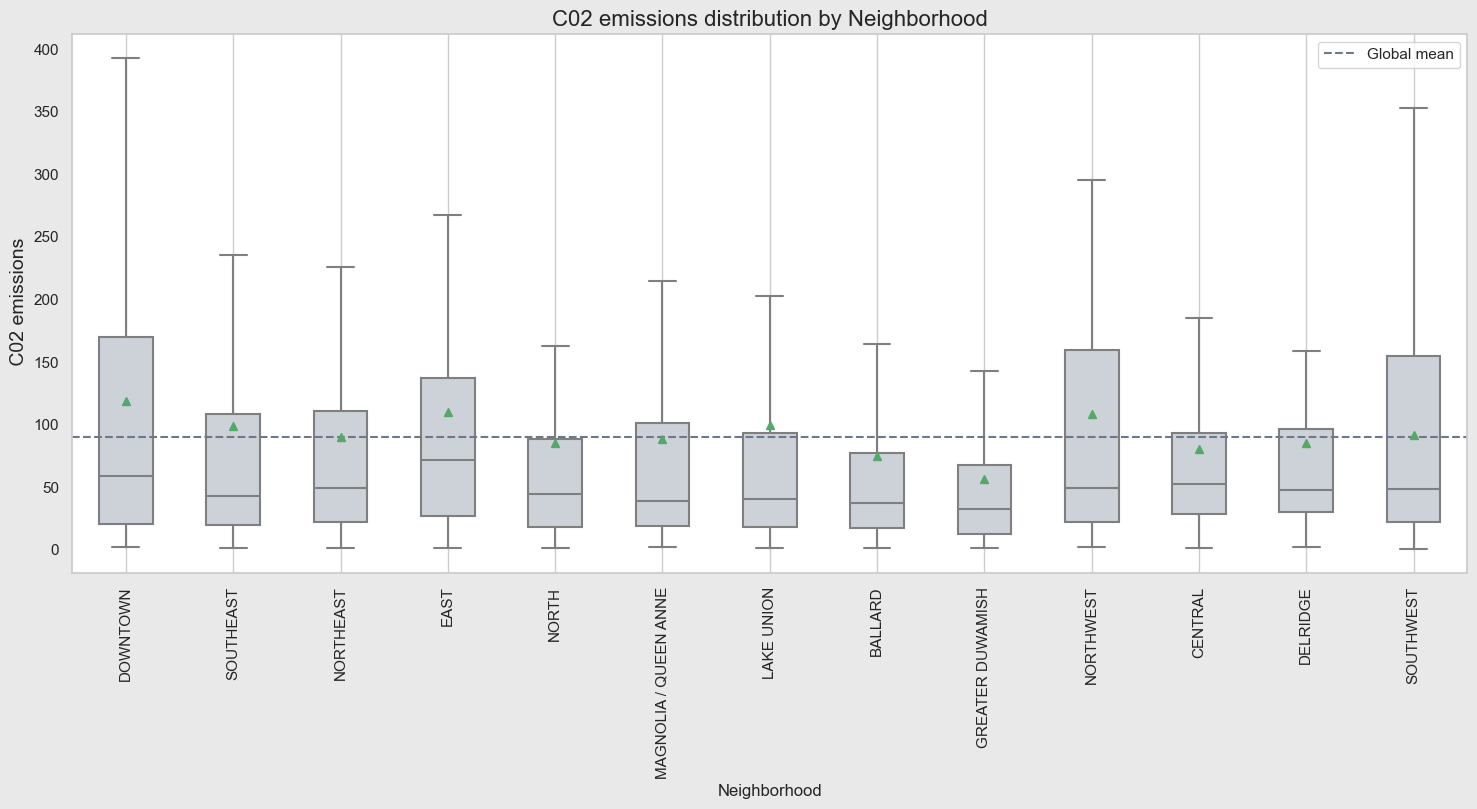

In [273]:
visualisation('Neighborhood',datas)

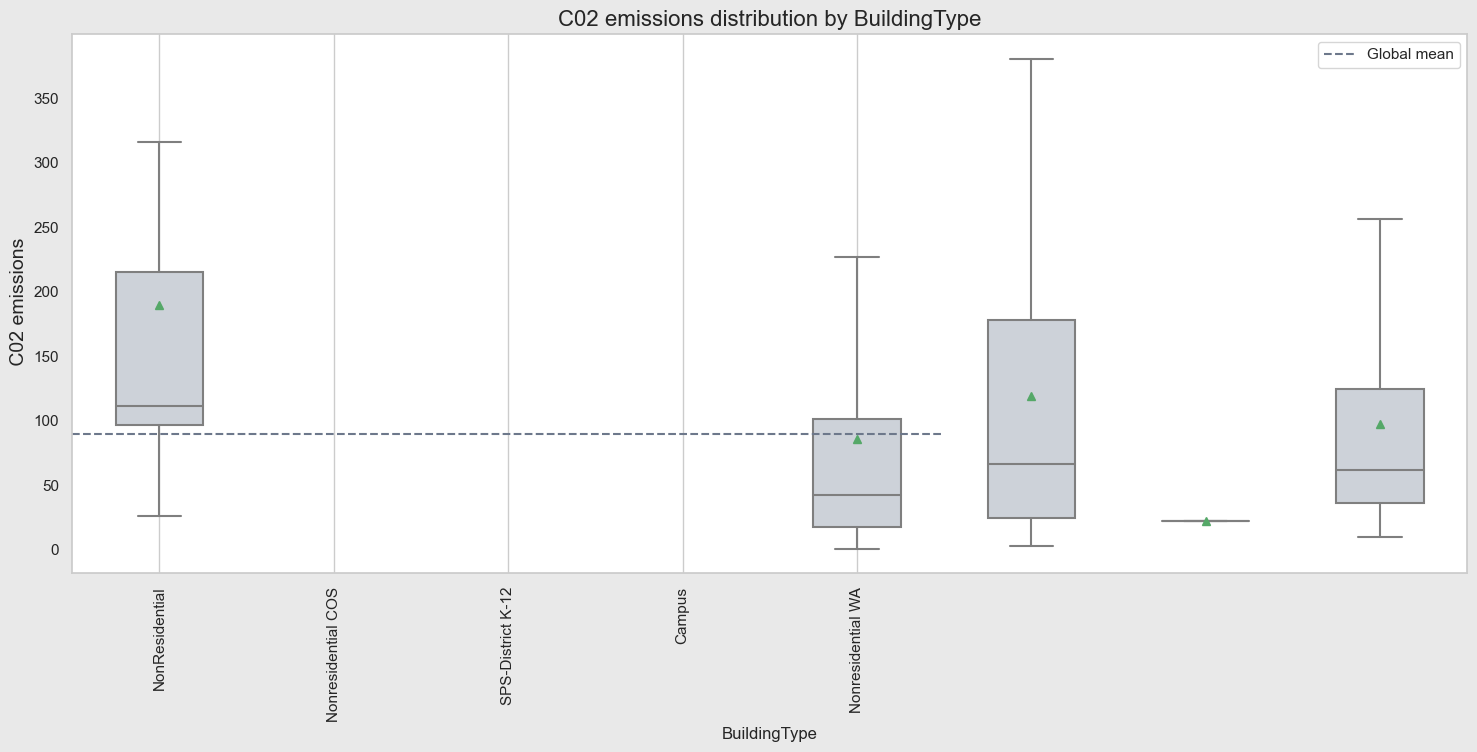

In [274]:
visualisation('BuildingType',datas)

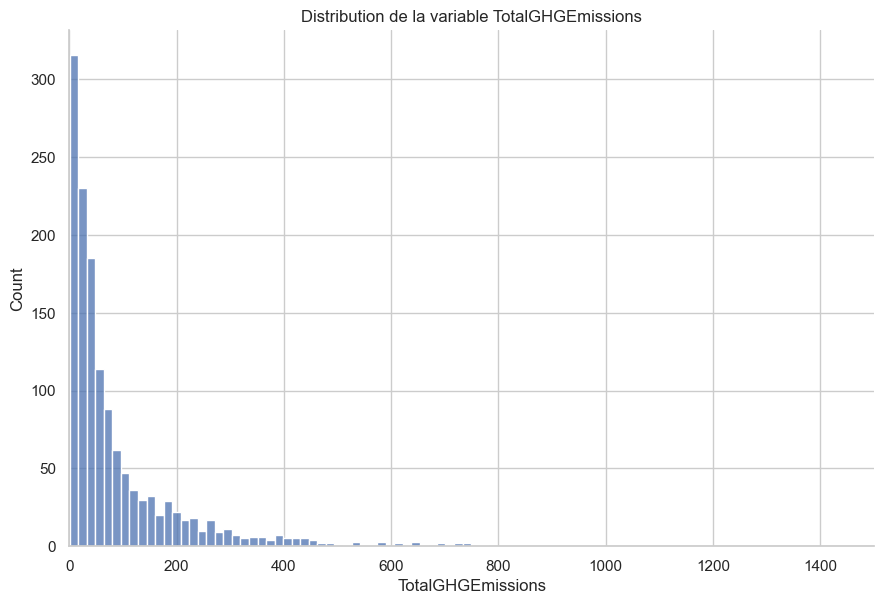

In [275]:
anaghg=sns.displot(datas['TotalGHGEmissions'], palette='bright', height=6, aspect=1.5)
plt.xlim(0,1500)
anaghg.set(title="Distribution de la variable TotalGHGEmissions")

In [276]:
print(datas.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')


<div class="alert alert-success">
    <font id="section_5">
    <h1 style="font-size:25px;"><strong>05. Corrélations linéaires</strong></h1>
</div>

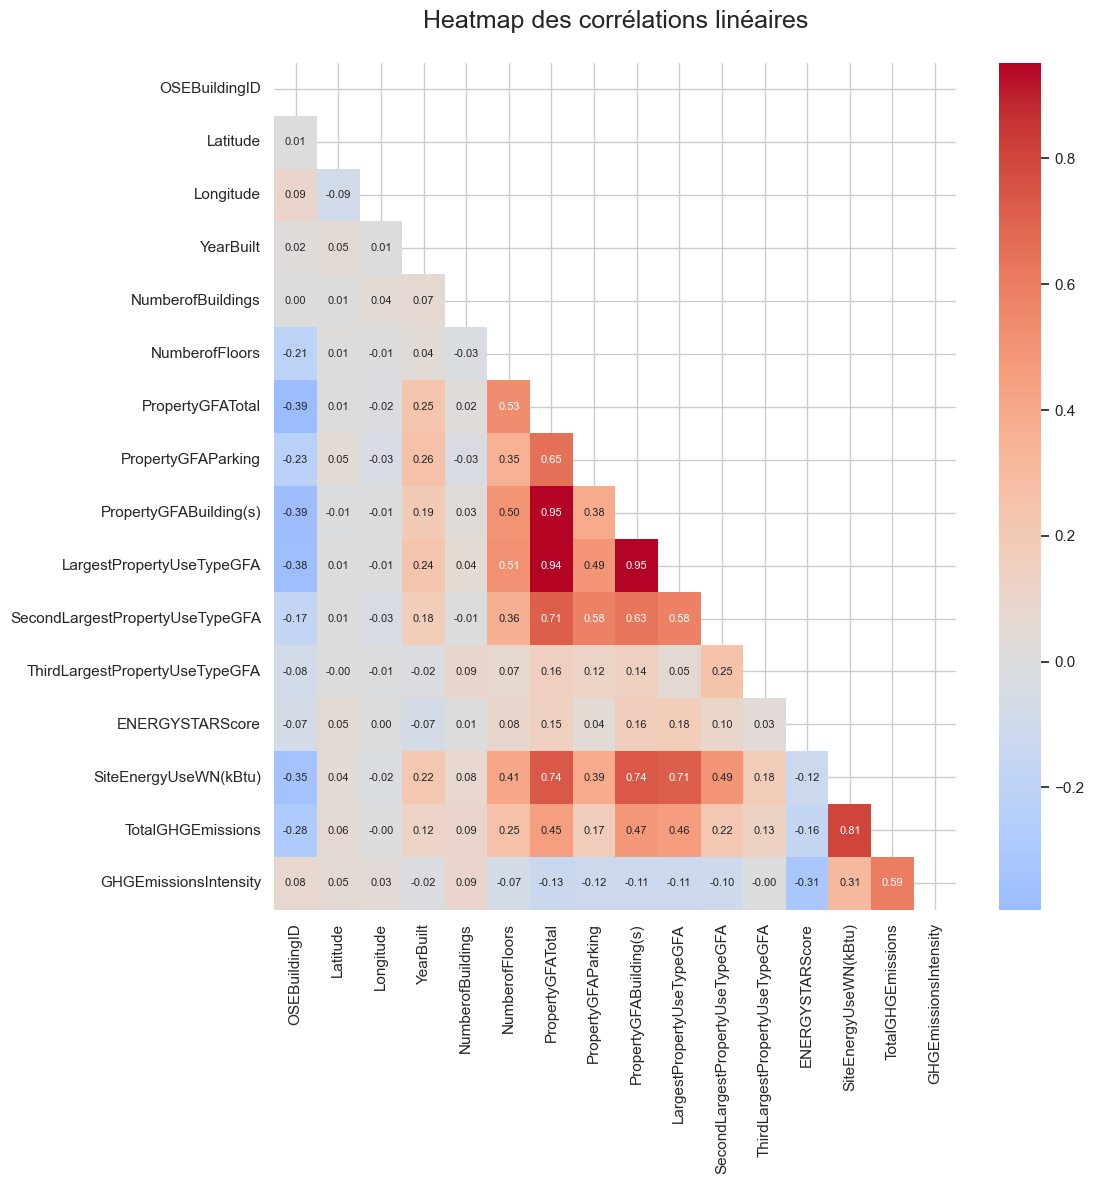

In [277]:
corr = datas.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

Observations

Corrélation importante entre : PropertyGFATotal et PropertyGFABuilding(s) / LargestPropertyUseTypeGFA
Corrélation importante entre PropertyGBABuilding(s) et LargestPropertyUseTypeGFA
Corrélation importante entre TotalGHEmissions et SiteEnergyUseWN(kBtu) (on notera que ce sont les deux variables qu'on cherche à prédire, ce qui laisse présager


In [278]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                    level_1  corr_coeff
14                 PropertyGFATotal     PropertyGFABuilding(s)     0.95165
12        LargestPropertyUseTypeGFA     PropertyGFABuilding(s)     0.94717
10                 PropertyGFATotal  LargestPropertyUseTypeGFA     0.94295
8                 TotalGHGEmissions      SiteEnergyUseWN(kBtu)     0.80596
6            PropertyGFABuilding(s)      SiteEnergyUseWN(kBtu)     0.73804
4             SiteEnergyUseWN(kBtu)           PropertyGFATotal     0.73794
2         LargestPropertyUseTypeGFA      SiteEnergyUseWN(kBtu)     0.71436
0   SecondLargestPropertyUseTypeGFA           PropertyGFATotal     0.71266

### Indépendance des variables

In [279]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def test_chi2(serie1, serie2):
    
    alpha = 0.03    
    
    #H0 : les variables sont indépendantes
    
    #print('tableau de contingence :\n', pd.crosstab(serie1.array, serie2.array))
    tab_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
    print('chi2 : {},\np : {},\ndof : {}\n'.format(stat_chi2, p, dof))
    print('tableau de contingence : \n', tab_contingence)
    
    critical = chi2.ppf(1-alpha, dof) #
    #print('critital : ', critical)

    if p <= alpha:
        print('Variables non indépendantes (H0 rejetée) car p = {} <= alpha = {}'.format(p, alpha))
        return False
    
    else:
        print('H0 non rejetée car p = {} >= alpha = {}'.format(p, alpha))
        return True

In [280]:
x = pd.cut(datas['SiteEnergyUseWN(kBtu)'], 20)
for column in datas.select_dtypes(include = ['int32','float64']).columns:
    print('test d\'indépendance {} / {}'.format('SiteEnergyUseWN(kBtu)',column))
    if datas[column].nunique() > 20 :
        y = pd.cut(datas[column], 20).astype('category')
    else:
        y = datas[column].astype('category')
    test_chi2(x, y)
    #print('__\nX:\nx')
    #print(x)
    #print('__\nX:\nx')
    #print(y)
        #table = pd.DataFrame({'nutriscore' : x, column : y})
    #print(table.sample(10))
    print('_______________________________________________________________\n')

test d'indépendance SiteEnergyUseWN(kBtu) / OSEBuildingID
chi2 : 541.721736046277,
p : 4.463578005193e-35,
dof : 192

tableau de contingence : 
 col_0                     (-49.225, 2512.25]  (17579.75, 20091.0]  \
row_0                                                               
(-41225.944, 2061297.2]                   74                   38   
(2061297.2, 4122594.4]                    96                   20   
(4122594.4, 6183891.6]                    80                    6   
(6183891.6, 8245188.8]                    57                    3   
(8245188.8, 10306486.0]                   41                    0   
(10306486.0, 12367783.2]                  21                    1   
(12367783.2, 14429080.4]                  18                    0   
(14429080.4, 16490377.6]                  18                    0   
(16490377.6, 18551674.8]                  11                    0   
(18551674.8, 20612972.0]                  10                    0   
(20612972.0, 22674269.2]   

chi2 : 877.9947150714883,
p : 1.7164162135770217e-99,
dof : 160

tableau de contingence : 
 col_0                     (-103.2, 5160.0]  (5160.0, 10320.0]  \
row_0                                                           
(-41225.944, 2061297.2]                600                 17   
(2061297.2, 4122594.4]                 299                 13   
(4122594.4, 6183891.6]                 132                  5   
(6183891.6, 8245188.8]                  84                  3   
(8245188.8, 10306486.0]                 57                  1   
(10306486.0, 12367783.2]                25                  2   
(12367783.2, 14429080.4]                25                  0   
(14429080.4, 16490377.6]                21                  1   
(16490377.6, 18551674.8]                15                  0   
(18551674.8, 20612972.0]                12                  0   
(20612972.0, 22674269.2]                 8                  0   
(22674269.2, 24735566.4]                 4                  0  

In [281]:
def split_words(df, column = None):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

list_use_type = split_words(datas, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usages dans la base : {}".format(len(list_use_type)))

Nombre de type d'usages dans la base : 106


In [282]:
datas['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in datas['ListOfAllPropertyUseTypes'].str.split(',')]
datas.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

In [283]:
gfa_features = [col for col in datas.columns if 'GFA' in col]
datas[['TotalUseTypeNumber'] + gfa_features].head(10)

TotalUseTypeNumber  PropertyGFATotal  PropertyGFAParking  \
0                    1           88434.0                 0.0   
3                    1           61320.0                 0.0   
5                    1           97288.0             37198.0   
6                    1           83008.0                 0.0   
7                    1          102761.0                 0.0   
8                    1          163984.0                 0.0   
10                   1          153163.0             19279.0   
11                   1          333176.0             61161.0   
12                   1           65009.0                 0.0   
13                   2          315952.0             57600.0   

    PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                  88434.0                    88434.0   
3                  61320.0                    61320.0   
5                  60090.0                    88830.0   
6                  83008.0                    81352.0   
7                 102761.0                   102761.0   
8                 163984.0                   163984.0   
10                133884.0                   133884.0   
11                272015.0                   336640.0   
12                 65009.0                    65009.0   
13                258352.0                   295511.0   

    SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
0                               0.0                             0.0  
3                               0.0                             0.0  
5                               0.0                             0.0  
6                               0.0                             0.0  
7                               0.0                             0.0  
8                               0.0                             0.0  
10                              0.0                             0.0  
11                              0.0                             0.0  
12                              0.0                             0.0  
13                          57600.0                             0.0

<div class="alert alert-success">
    <font id="section_5_1">
    <h1 style="font-size:25px;"><strong>5.1 Analyse des variables à prédire</strong></h1>
</div>

### Pour rappel, les variables à prédire sont 'TotalGHGEmissions' et 'SiteEnergyUse(kBtu)'.

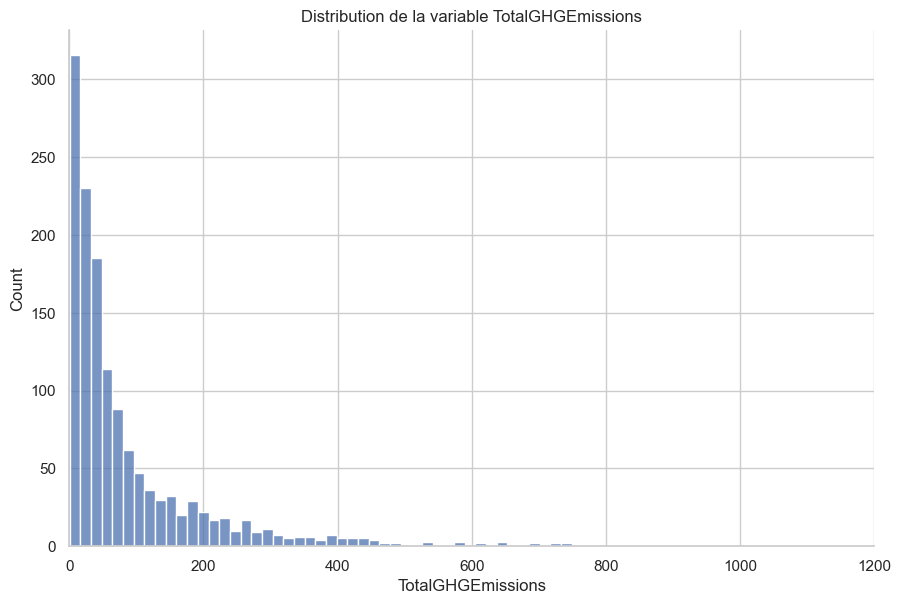

In [284]:
anaghg=sns.displot(datas['TotalGHGEmissions'], palette='bright', height=6, aspect=1.5)
plt.xlim(0,1200)
anaghg.set(title="Distribution de la variable TotalGHGEmissions")

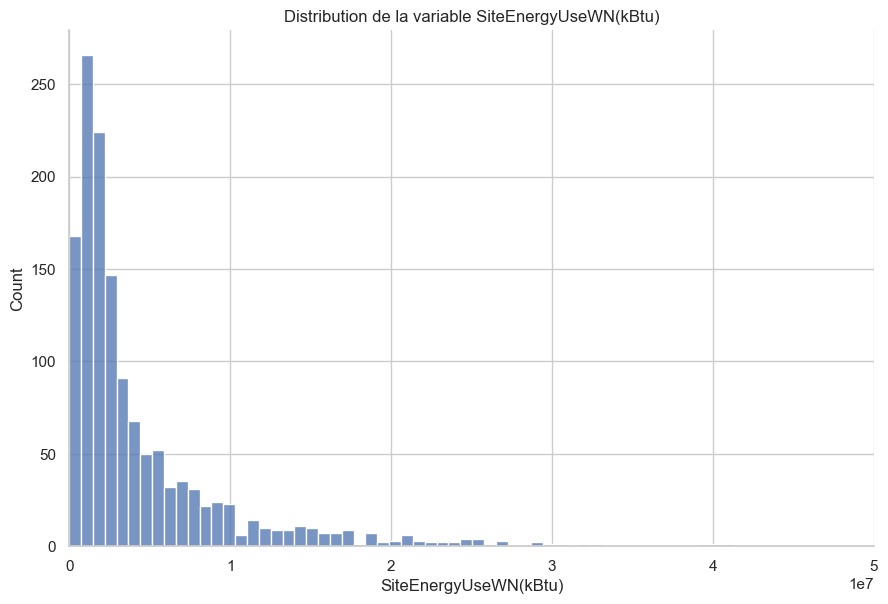

In [285]:
anaseu=sns.displot(datas['SiteEnergyUseWN(kBtu)'], palette='bright', height=6, aspect=1.5)
plt.xlim(0,0.5e8)
anaseu.set(title="Distribution de la variable SiteEnergyUseWN(kBtu)")

### Transformation variable de prédiction

In [286]:
test = np.log(datas['SiteEnergyUseWN(kBtu)'])
test1p = np.log1p(datas['SiteEnergyUseWN(kBtu)'])
test2 = np.log2(datas['SiteEnergyUseWN(kBtu)'])
test2p = np.log2(1+datas['SiteEnergyUseWN(kBtu)'])
test2p

0       22.83015
3       22.72792
5       23.58483
6       22.53155
7       22.75285
          ...   
3369    18.65988
3370    19.96780
3371    19.84690
3372    20.00704
3375    20.30310
Name: SiteEnergyUseWN(kBtu), Length: 1375, dtype: float64

In [287]:
import numpy as np
import pandas as pd

# Définir la plage de valeurs autorisées
lower_limit = -1e6  # limite inférieure
upper_limit = 1e6   # limite supérieure

# Filtrer les valeurs et appliquer la transformation
filtered_data = np.clip(datas['SiteEnergyUseWN(kBtu)'], lower_limit, upper_limit)
log_transformed = np.log(filtered_data)
log_transformed

0       13.81551
3       13.81551
5       13.81551
6       13.81551
7       13.81551
          ...   
3369    12.93404
3370    13.81551
3371    13.75682
3372    13.81551
3375    13.81551
Name: SiteEnergyUseWN(kBtu), Length: 1375, dtype: float64

Afin d'améliorer l'algorithme, nous allons ajuster la forme de la distribution afin d'obtenir une variable dont la distribution présente une similitude avec celle d'une loi normale.

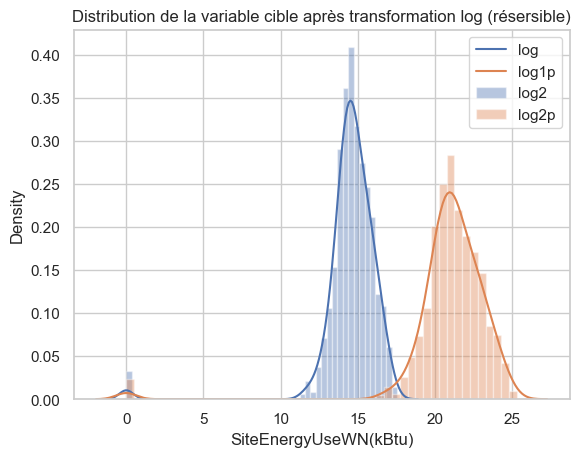

In [288]:
plt.title('Distribution de la variable cible après transformation log (résersible)')
#sns.distplot(test)
sns.distplot(test1p)
#sns.distplot(test2)
sns.distplot(test2p)
ax = plt.gca()
ax.legend(['log','log1p', 'log2', 'log2p'])

On va conserver la variable après la transformation log2 :

In [289]:
datas['Log2-SiteEnergyUseWN(kBtu)'] = test2p

In [290]:
# Definir el nuevo orden de las columnas y los tipos de datos deseados
nuevo_orden = ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
               'Neighborhood', 'YearBuilt', 'NumberofBuildings',
               'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
               'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
               'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
               'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'Outlier','Latitude', 'Longitude', 'TotalGHGEmissions',
               'GHGEmissionsIntensity', 'Log2-SiteEnergyUseWN(kBtu)']

nuevos_tipos = {'OSEBuildingID': int, 'DataYear': int, 'BuildingType': str, 'PrimaryPropertyType': str,
                'CouncilDistrictCode': int, 'Neighborhood': str, 
                'YearBuilt': int, 'NumberofBuildings': float, 'NumberofFloors': float, 'PropertyGFATotal': int,
                'PropertyGFAParking': int, 'PropertyGFABuilding(s)': int, 'LargestPropertyUseType': str,
                'LargestPropertyUseTypeGFA': float, 'SecondLargestPropertyUseType': str,
                'SecondLargestPropertyUseTypeGFA': float, 'ThirdLargestPropertyUseType': str,
                'ThirdLargestPropertyUseTypeGFA': float, 'ENERGYSTARScore': float, 'SiteEnergyUseWN(kBtu)': float,
                'Outlier': str, 'Latitude': float, 'Longitude': float,'TotalGHGEmissions': float, 'GHGEmissionsIntensity': float,
                'Log2-SiteEnergyUseWN(kBtu)': float}

# Reordenar las columnas y cambiar los tipos de datos
datas = datas.reindex(columns=nuevo_orden).astype(nuevos_tipos)

In [291]:
# Trouver les indices des valeurs NaN dans les colonnes spécifiques
indices_nan = datas[["LargestPropertyUseTypeGFA", "SiteEnergyUseWN(kBtu)", "Log2-SiteEnergyUseWN(kBtu)"]].isnull().any(axis=1)

# Supprimer les lignes contenant des valeurs NaN dans les colonnes spécifiques
datas.drop(indices_nan.index[indices_nan], inplace=True)


<div class="alert alert-success">
    <font id="section_6">
    <h1 style="font-size:25px;"><strong>06. Export du fichier nettoyé</strong></h1>
</div>


Sauvegardons les données dans un nouveau fichier pour travailler sur les différents modèles de prédiction.

In [292]:
datas.drop(columns=["OSEBuildingID"]).to_csv("data_cleaned.csv", index=True, index_label="Index")

<Axes: >

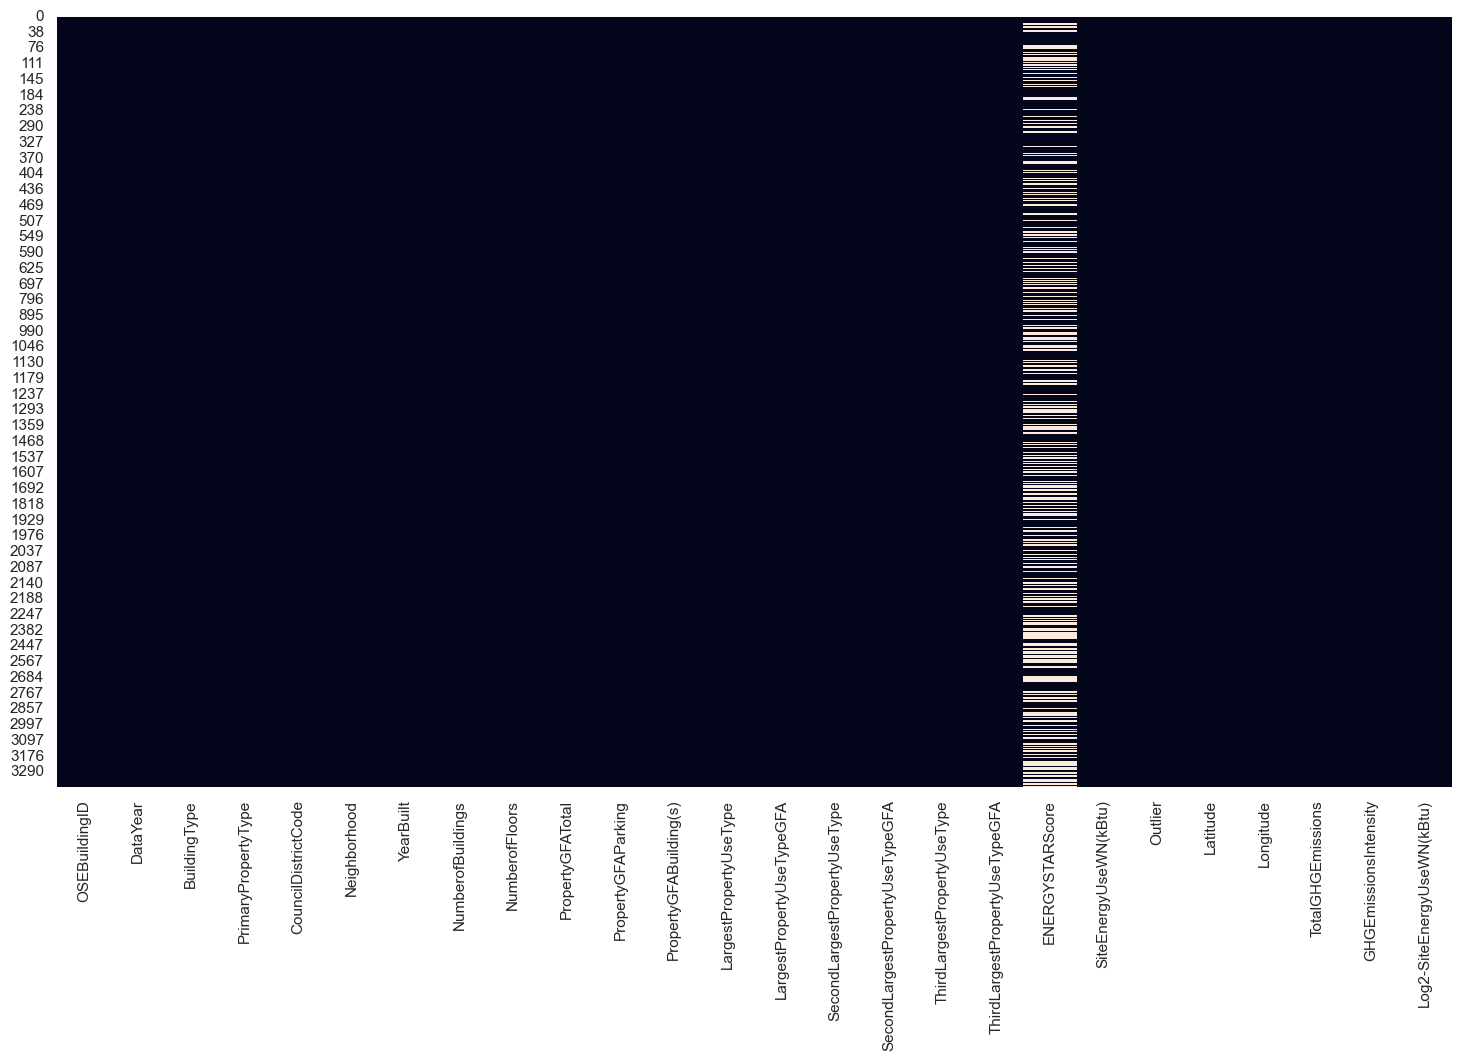

In [293]:
plt.figure(figsize=(18,10))
sns.heatmap(datas.isnull(), cbar=False)

In [294]:
datas_nan = datas.isna().sum().sort_values(ascending=False)
datas_nan

ENERGYSTARScore                    495
OSEBuildingID                        0
DataYear                             0
GHGEmissionsIntensity                0
TotalGHGEmissions                    0
Longitude                            0
Latitude                             0
Outlier                              0
SiteEnergyUseWN(kBtu)                0
ThirdLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA      0
SecondLargestPropertyUseType         0
LargestPropertyUseTypeGFA            0
LargestPropertyUseType               0
PropertyGFABuilding(s)               0
PropertyGFAParking                   0
PropertyGFATotal                     0
NumberofFloors                       0
NumberofBuildings                    0
YearBuilt                            0
Neighborhood                         0
CouncilDistrictCode                  0
PrimaryPropertyType                  0
BuildingType                         0
Log2-SiteEnergyUseWN(kBtu

In [295]:
print ("Le dataset compte {} lignes et {} variables".format(datas.shape[0], datas.shape[1]))

Le dataset compte 1370 lignes et 26 variables


<div class="alert alert-success">
    <font id="section_7">
    <h1 style="font-size:25px;"><strong>07. Liens importants</strong></h1>
</div>

* <a href="https://openclassrooms.com/fr/projects/629/assignmen" target="_blank">Lien vers consignes : </a>

* <a href="https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what" target="_blank">Lien vers score Star Energy : </a>

* <a href="https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy" target="_blank">Lien vers la signification des variables: </a>

* Notebooks consultés
* 1. <a href="https://www.kaggle.com/code/marcbourgeois/p-lec-01-cleaning" target="_blank">Kaggle Notebook 1  : </a>
* 2. <a href="https://www.kaggle.com/code/marcbourgeois/p-lec-01-cleaning" target="_blank">Kaggle Notebook 2  : </a>
 
 

In [296]:
#Enregistrer le temps de fin
fin = time.time()

In [297]:
#Calculer la durée en secondes
durée = (fin - début) 

In [298]:
#Afficher le temps d'exécution
print("Le temps d'exécution était de", durée, "secondes.")

Le temps d'exécution était de 15.108982801437378 secondes.
